# Ejercicio de visión artificial: lego bricks

Imaginemos por un momento que un niño está jugando con un conjunto de piezas de Lego y, tras recogerlas y guardarlas en su caja, queremos comprobar que no se ha extraviado ninguna. Tradicionalmente, esto conllevaría un esfuerzo enorme, pues deberíamos contabilizar las piezas una por una y validar que no se ha extraviado ninguna.

Por suerte estamos en el siglo XXI y existe la IA. El modus operandi consistiría en volcar la caja encima de una superficie llana, tomar una fotografía con el móvil, y procesar dicha fotografía con un sistema de machine learning entrenado para reconocer los
diferentes tipos de pieza. Dicho así, suena fácil; y realmente, no es tan difícil como parece.

Sin embargo, en este ejercicio, únicamente nos ocuparemos de realizar el reconocimiento de piezas una por una (en una foto a reconocer, únicamente habrá una pieza). Tienes libertad total para elegir tecnología, framework, entorno de desarrollo y,
en definitiva, cualquier herramienta así como consultar en Internet u otras fuentes.
Es muy importante llegar al 100% de acierto en la detección de las piezas de Lego
para dar por válido el ejercicio.

Los pasos para llevar a cabo el ejercicio son:
1. Descargar fotos: https://www.kaggle.com/datasets/joosthazelzet/lego-brickimages
2. Entrenar los modelos de machine learning para reconocer las piezas
3. Validar el resultado ejecutando pruebas manualmente

## SOLUCION DEL PROBLEMA
Este ejercicio se ha dividido en 2 archivos principales:

1. **Practica09_LegoBricks_entrenamiento.ipynb**
Este archivo esta creado para ejecutarse en el entorno Google Colab y es el encargado de preprocesar todo el dataset, entrenar el modelo y generar el archivo resultante que sera el que se use en el archivo nº2 para hacer las predicciones. Para ello se ha utilizado un modelo de red neuronal convolucional (CNN) utilizando la arquitectura *EfficientNet*, que es conocida por su eficiencia y buen rendimiento en tareas de visión por computadora.

    Tras varios entrenamientos se han obtenido puntuaciones de F1-Score del 98.74%, 98.9%, 99.53% y finalmente se ha obtenido un modelo con un F1-Score del 100%, pero para evitar riesgo de sobreajuste, hemos decidido no usar este, sino el anterior (F1-Score=99.53%) que ha demostrado una eficacia excelente sin riesgo de overfiting.

2. **Practica09_LegoBricks_predicciones.ipynb**
Este archivo, bastante mas reducido, es el que se encarga de hacer las predicciones. No es necesario ejecutarlo en Google Colab sino que se puede ejecutar en modo local en nuestro ordenador. Este archivo, a su vez, ofrece al usuario 2 opciones distintas:
    - Opcion 1: Pregunta al usuario la imagen que desea analizar y el modelo predice la clase y muestra tanto la imagen seleccionada por el usuario como la imagen predicha por el modelo.
    - Opcion 2: Se ha automatizado la opcion 1 de forma que en lugar de preguntarle al usuario que imagen quiere analizar, lo que hace es que toma 10 imagenes aleatorias de cada carpeta y hace la prediccion de cada una de las imagenes. De esa forma, el usuario no tiene que estar seleccionando imagenes para ir probando su eficacia, sino que el mismo codigo lo hace todo automaticamente, obteniendo asi 160 imaenes aleatorias con sus respectivas predicciones (16 clases x 10 imagenes).

## 1. Importar librerias

In [7]:
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

## 2. Calcular la metrica F1-Score
Esta función F1_score implementa el cálculo de la puntuación F1, que es una métrica que combina precisión y recall para evaluar el rendimiento de un modelo de clasificación binaria.

In [8]:
def F1_score(y_true, y_pred): 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())
    return f1_val

## 3. Cargar el modelo

In [9]:
# Cargar el modelo
model_path = 'C:/PYTHON/PRACTICAS/09 Lego Bricks/legos-16-(128 X 128)-99.53.h5'  # Ruta del modelo guardado
model = load_model(model_path, custom_objects={'F1_score': F1_score})

# Dimensiones de las imágenes esperadas por el modelo
IMAGE_HEIGHT, IMAGE_WIDTH = 128, 128

## 4. Funcion para mostrar las imagenes

In [10]:

def show_image(image_path, title, ax, width=None, height=None):
    # Cargar la imagen
    img = mpimg.imread(image_path)

    # Mostrar la imagen en el subplot
    ax.imshow(img)
    ax.set_title(title, fontsize=12)
    ax.axis('off')  # Desactivar ejes

## 5. Hacer la prediccion

In [13]:

# Función para realizar predicciones con una sola imagen
def predict_single_image(image_path, width=None, height=None):
    # Adaptamos la imagen al formato esperado por el modelo
    img = image.load_img(image_path, target_size=(IMAGE_HEIGHT, IMAGE_WIDTH))
    img_array = image.img_to_array(img)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)  # Convertir a formato de lote (batch)
    # Hacer la prediccion 
    prediction = model.predict(img_array)
    # Determinar la clase que el modelo predice como la más probable
    predicted_class = np.argmax(prediction)
    # Obtener la probabilidad asociada a la clase predicha.
    confidence = prediction[0][predicted_class]

    # Mapear el número de clase a su nombre correspondiente
    class_names = {
        0: '11214 Bush 3M friction with Cross axle',
        1: '18651 Cross Axle 2M with Snap friction',
        2: '2357 Brick corner 1x2x2',
        3: '3003 Brick 2x2',
        4: '3004 Brick 1x2',
        5: '3005 Brick 1x1',
        6: '3022 Plate 2x2',
        7: '3023 Plate 1x2',
        8: '3024 Plate 1x1',
        9: '3040 Roof Tile 1x2x45deg',
        10: '3069 Flat Tile 1x2',
        11: '32123 half Bush',
        12: '3673 Peg 2M',
        13: '3713 Bush for Cross Axle',
        14: '3794 Plate 1X2 with 1 Knob',
        15: '6632 Technic Lever 3M'
    }

    # Mapear el número de clase a su nombre correspondiente    
    class_folder_name = class_names[predicted_class]

    class_folder_path = f"C:/PYTHON/PRACTICAS/09 Lego Bricks/archive/LEGO_brick_images_v1/{class_folder_name}/"
    class_image_list = os.listdir(class_folder_path)

    # Obtener siempre la primera imagen de la carpeta predicha
    first_image = class_image_list[0]
    # Concatenar la carpeta principal + subcarpeta predicha + primer imagen
    class_image_path = os.path.join(class_folder_path, first_image)

    # Crear subplots
    fig, axs = plt.subplots(1, 2, figsize=(width, height))

    # Mostrar la imagen proporcionada a la izquierda
    show_image(image_path, 'IMAGEN ALEATORIA', axs[0], width, height)

    # Mostrar la primera imagen de la clase predicha a la derecha
    show_image(class_image_path, 'IMAGEN PREDICHA', axs[1], width, height)

    plt.tight_layout()
    plt.show()

    return predicted_class, confidence, img, class_folder_name

## 6. Verificacion manual y automatica de las predicciones


----------------------------------------
Analizando carpeta: 11214 Bush 3M friction with Cross axle
----------------------------------------

1/1 [==============================] - 0s 45ms/step


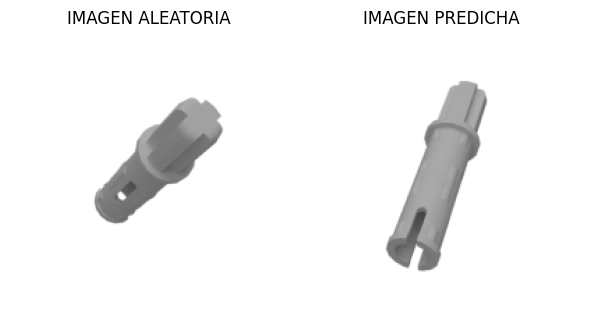

LA IMAGEN '201706171006-0264.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.78%

1/1 [==============================] - 0s 46ms/step


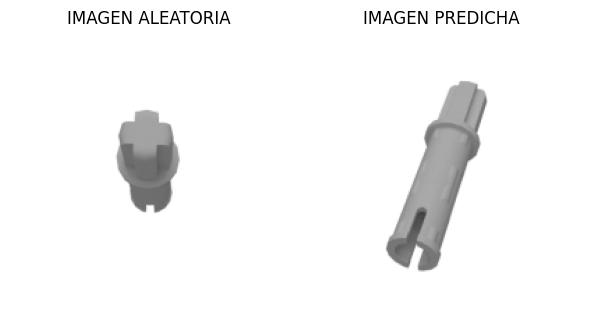

LA IMAGEN '201706171006-0261.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.97%

1/1 [==============================] - 0s 47ms/step


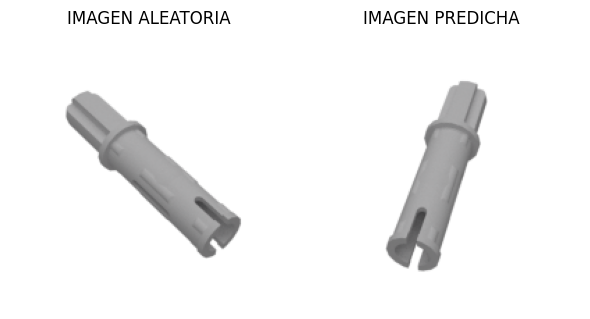

LA IMAGEN '201706171006-0004.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.37%

1/1 [==============================] - 0s 47ms/step


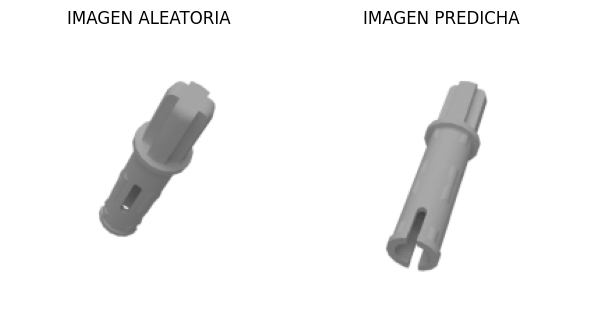

LA IMAGEN '201706171006-0155.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.29%

1/1 [==============================] - 0s 45ms/step


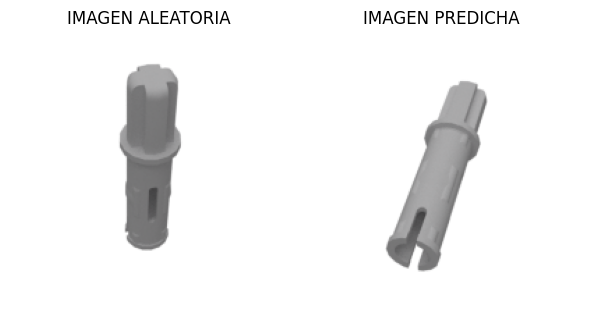

LA IMAGEN '201706171006-0197.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 97.92%

1/1 [==============================] - 0s 48ms/step


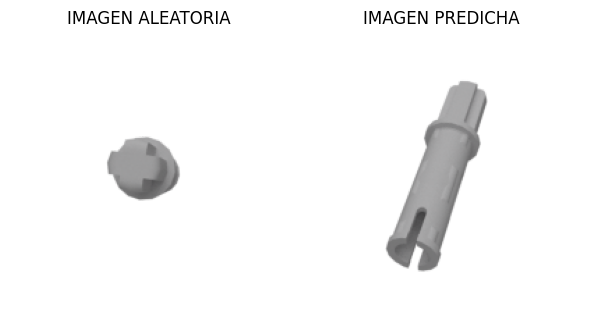

LA IMAGEN '201706171006-0111.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.73%

1/1 [==============================] - 0s 47ms/step


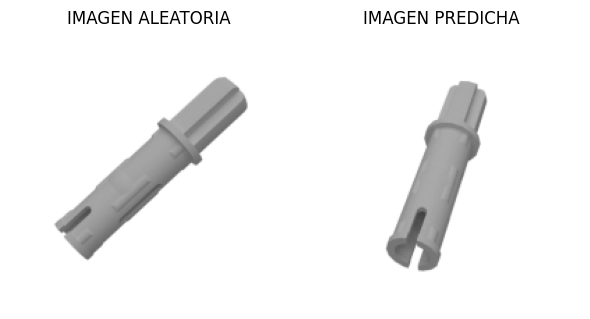

LA IMAGEN '201706171006-0348.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 97.60%

1/1 [==============================] - 0s 48ms/step


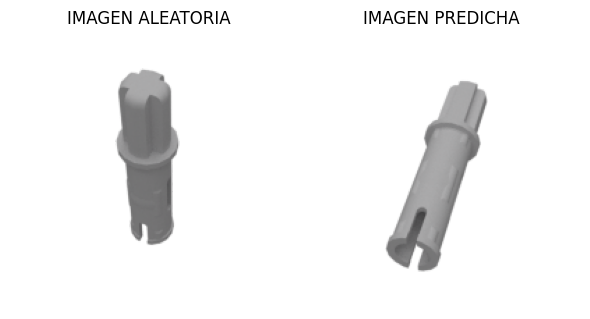

LA IMAGEN '201706171006-0190.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.40%

1/1 [==============================] - 0s 48ms/step


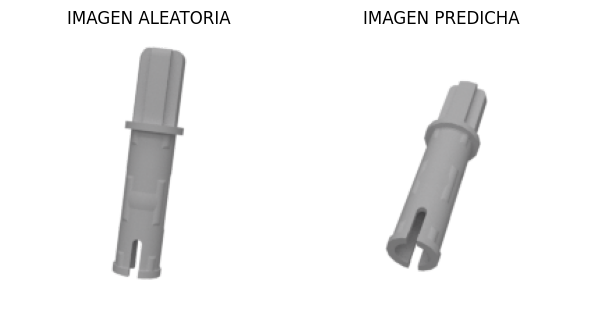

LA IMAGEN '201706171006-0101.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.23%

1/1 [==============================] - 0s 47ms/step


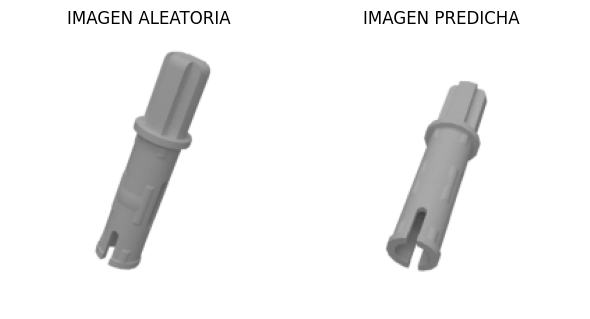

LA IMAGEN '201706171006-0269.png' PERTENECE A LA CLASE '11214 Bush 3M friction with Cross axle' con una confianza de 98.63%


----------------------------------------
Analizando carpeta: 18651 Cross Axle 2M with Snap friction
----------------------------------------

1/1 [==============================] - 0s 46ms/step


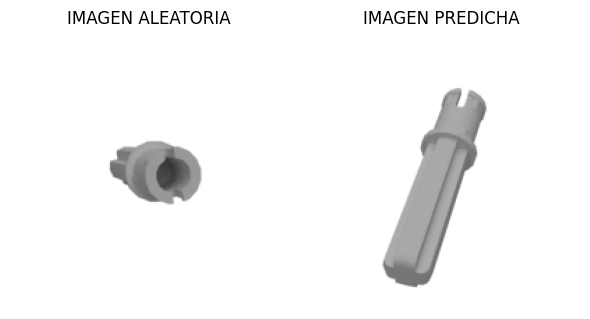

LA IMAGEN '201706171106-0302.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 99.14%

1/1 [==============================] - 0s 46ms/step


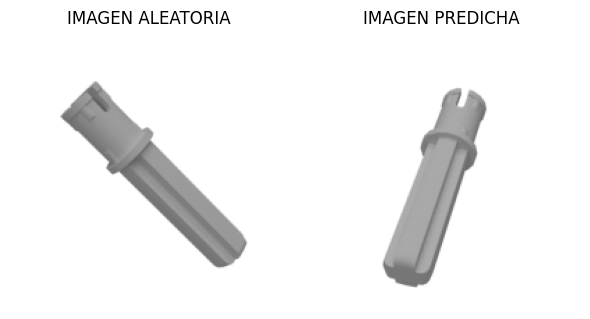

LA IMAGEN '201706171106-0085.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 98.60%

1/1 [==============================] - 0s 46ms/step


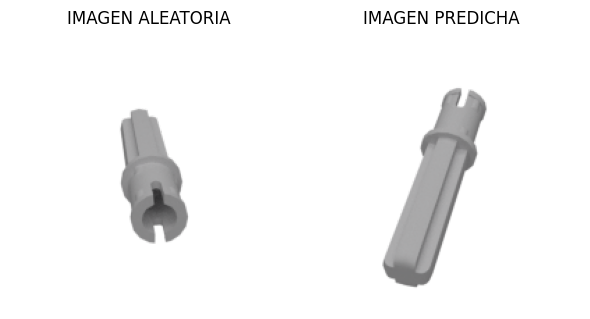

LA IMAGEN '201706171106-0052.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 99.45%

1/1 [==============================] - 0s 47ms/step


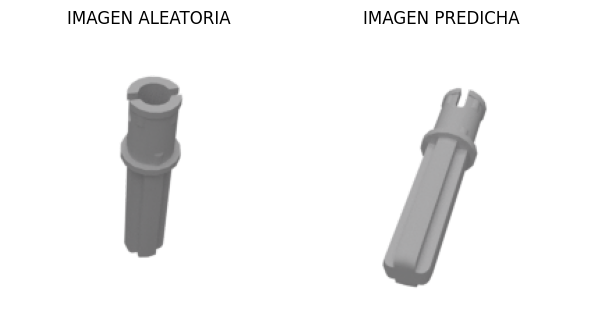

LA IMAGEN '201706171106-0207.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 98.47%

1/1 [==============================] - 0s 45ms/step


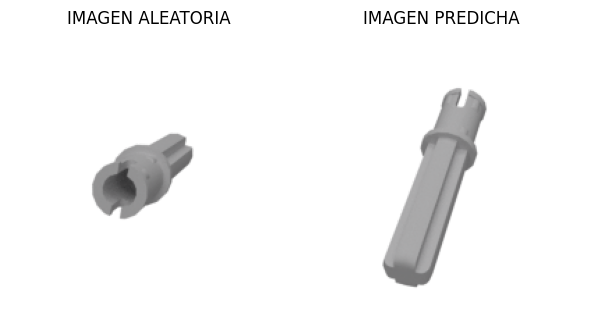

LA IMAGEN '201706171106-0320.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 99.03%

1/1 [==============================] - 0s 44ms/step


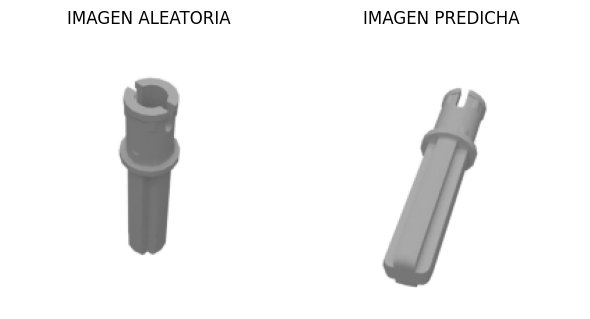

LA IMAGEN '201706171106-0204.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 98.53%

1/1 [==============================] - 0s 48ms/step


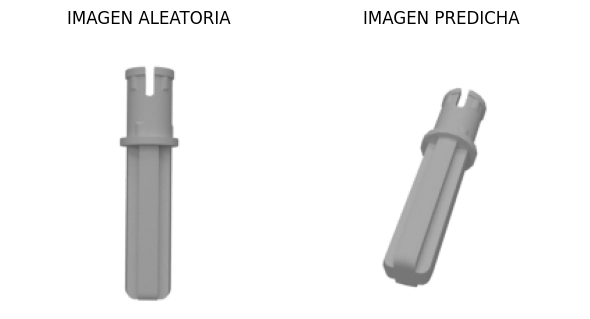

LA IMAGEN '201706171106-0311.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 98.67%

1/1 [==============================] - 0s 47ms/step


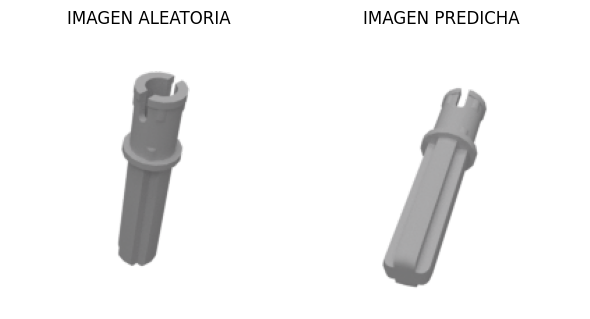

LA IMAGEN '201706171106-0179.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 98.75%

1/1 [==============================] - 0s 49ms/step


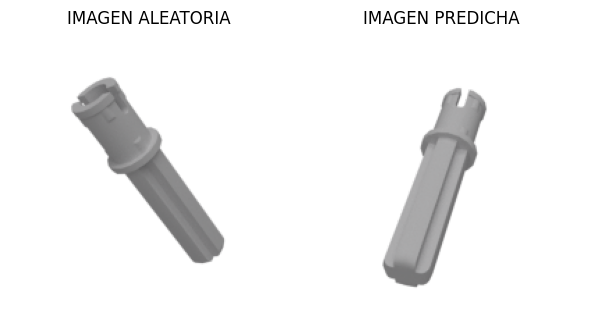

LA IMAGEN '201706171106-0275.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 98.73%

1/1 [==============================] - 0s 46ms/step


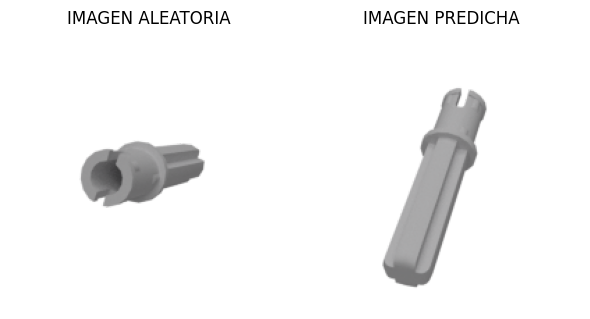

LA IMAGEN '201706171106-0090.png' PERTENECE A LA CLASE '18651 Cross Axle 2M with Snap friction' con una confianza de 99.06%


----------------------------------------
Analizando carpeta: 2357 Brick corner 1x2x2
----------------------------------------

1/1 [==============================] - 0s 48ms/step


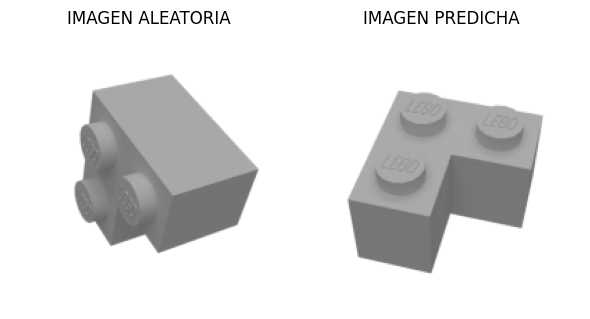

LA IMAGEN '201706171206-0178.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.03%

1/1 [==============================] - 0s 48ms/step


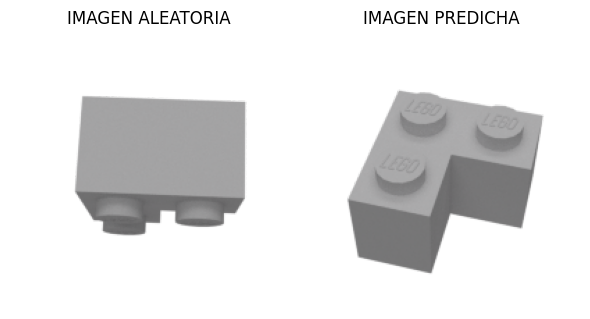

LA IMAGEN '201706171206-0261.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.25%

1/1 [==============================] - 0s 44ms/step


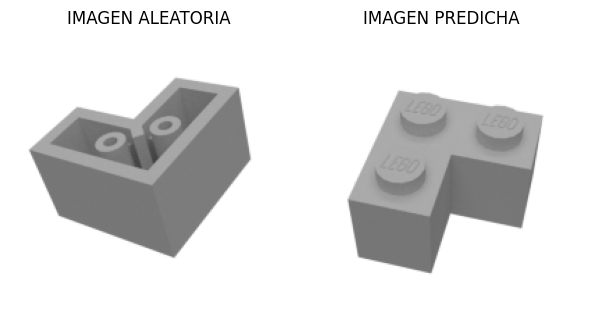

LA IMAGEN '201706171206-0364.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 97.54%

1/1 [==============================] - 0s 56ms/step


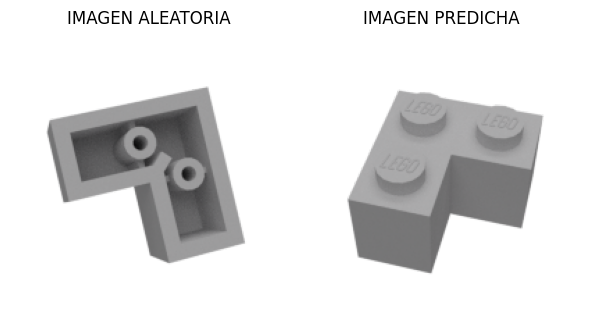

LA IMAGEN '201706171206-0312.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 97.69%

1/1 [==============================] - 0s 47ms/step


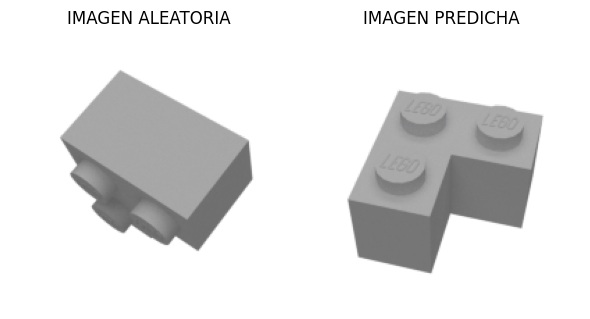

LA IMAGEN '201706171206-0239.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.34%

1/1 [==============================] - 0s 46ms/step


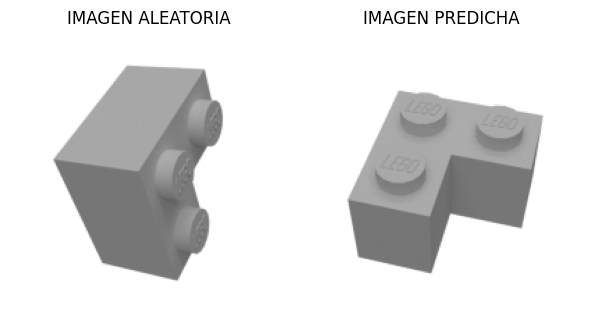

LA IMAGEN '201706171206-0165.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.98%

1/1 [==============================] - 0s 50ms/step


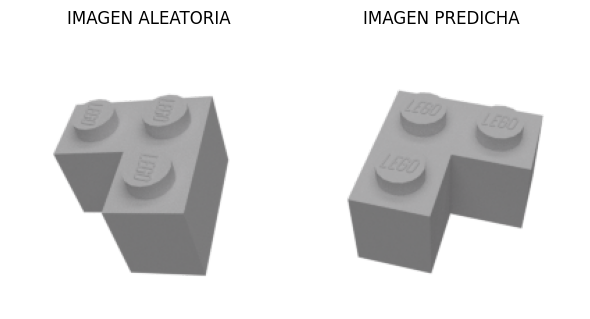

LA IMAGEN '201706171206-0036.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.84%

1/1 [==============================] - 0s 49ms/step


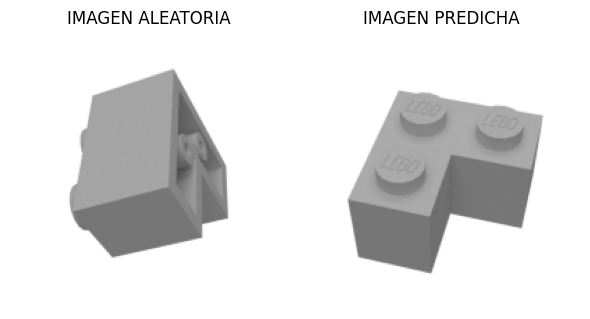

LA IMAGEN '201706171206-0256.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 97.85%

1/1 [==============================] - 0s 50ms/step


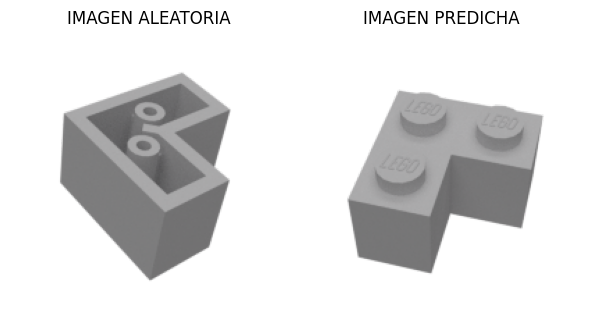

LA IMAGEN '201706171206-0378.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.28%

1/1 [==============================] - 0s 72ms/step


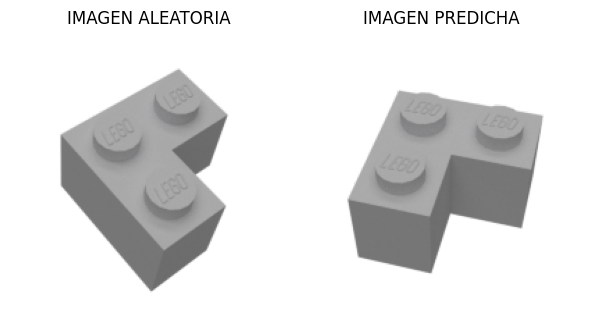

LA IMAGEN '201706171206-0024.png' PERTENECE A LA CLASE '2357 Brick corner 1x2x2' con una confianza de 98.90%


----------------------------------------
Analizando carpeta: 3003 Brick 2x2
----------------------------------------

1/1 [==============================] - 0s 47ms/step


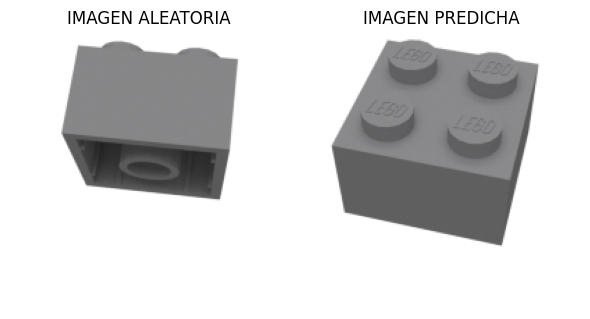

LA IMAGEN '0151.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 98.03%

1/1 [==============================] - 0s 48ms/step


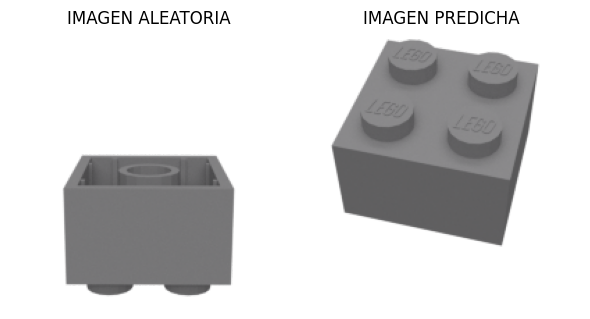

LA IMAGEN '0321.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.83%

1/1 [==============================] - 0s 59ms/step


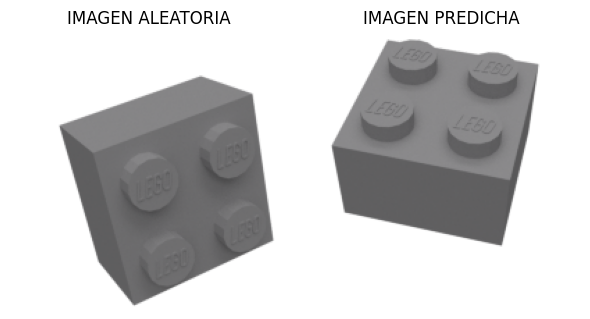

LA IMAGEN '0143.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 96.69%

1/1 [==============================] - 0s 51ms/step


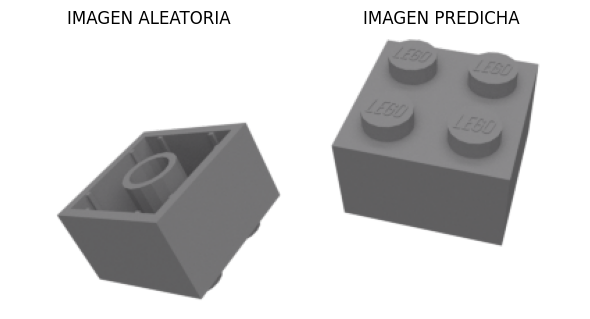

LA IMAGEN '0324.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.85%

1/1 [==============================] - 0s 48ms/step


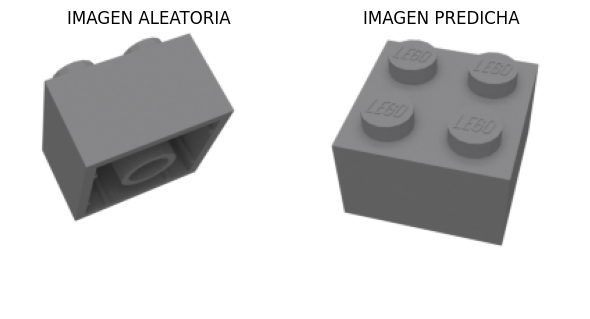

LA IMAGEN '0153.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 98.74%

1/1 [==============================] - 0s 45ms/step


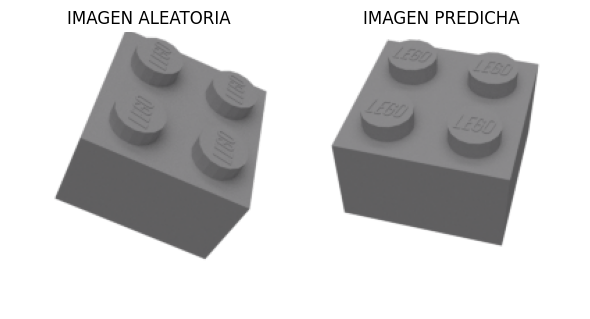

LA IMAGEN '0046.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.17%

1/1 [==============================] - 0s 48ms/step


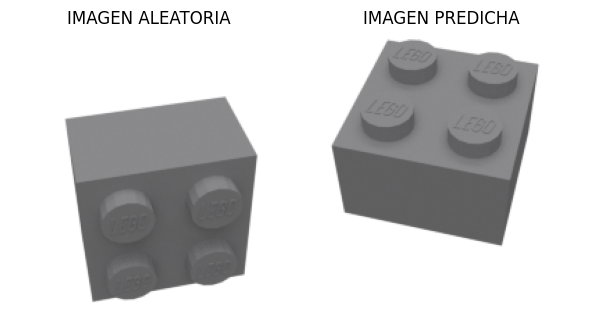

LA IMAGEN '0182.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.21%

1/1 [==============================] - 0s 59ms/step


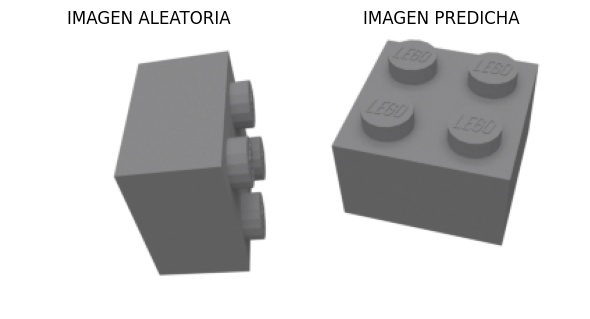

LA IMAGEN '0166.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.15%

1/1 [==============================] - 0s 44ms/step


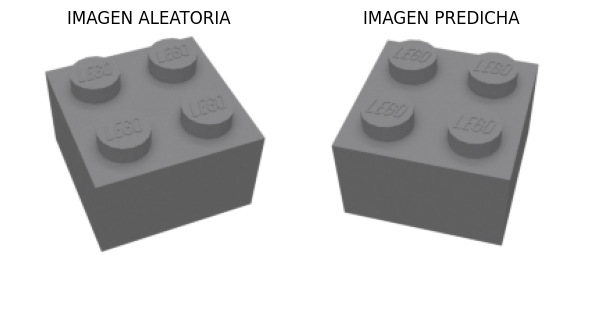

LA IMAGEN '0003.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.43%

1/1 [==============================] - 0s 72ms/step


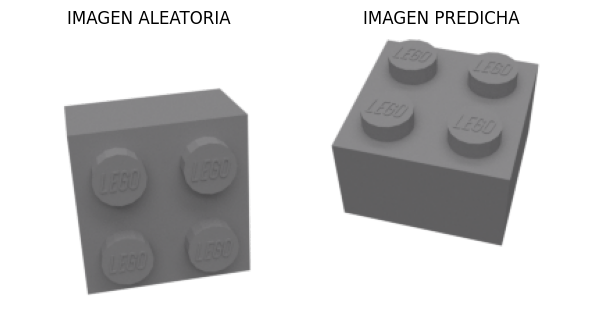

LA IMAGEN '0142.png' PERTENECE A LA CLASE '3003 Brick 2x2' con una confianza de 97.08%


----------------------------------------
Analizando carpeta: 3004 Brick 1x2
----------------------------------------

1/1 [==============================] - 0s 50ms/step


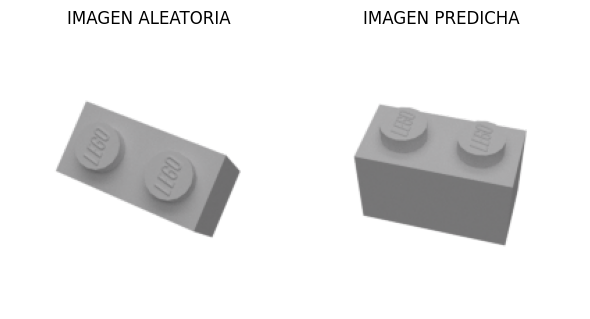

LA IMAGEN '0080.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 97.42%

1/1 [==============================] - 0s 58ms/step


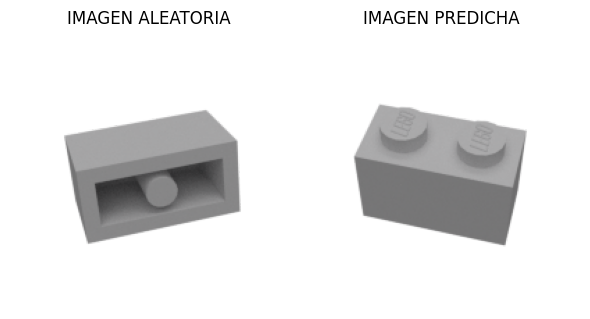

LA IMAGEN '0252.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 98.41%

1/1 [==============================] - 0s 53ms/step


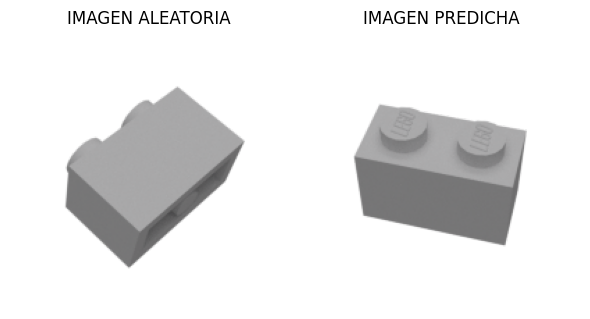

LA IMAGEN '0174.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 99.26%

1/1 [==============================] - 0s 46ms/step


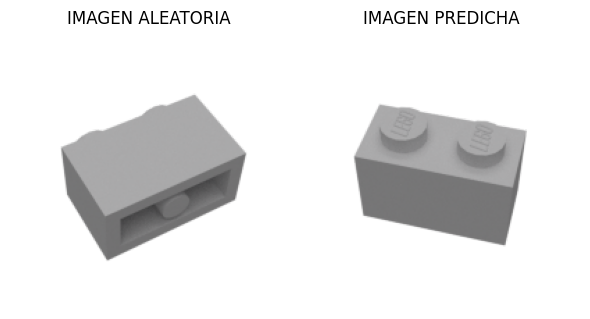

LA IMAGEN '0193.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 98.54%

1/1 [==============================] - 0s 52ms/step


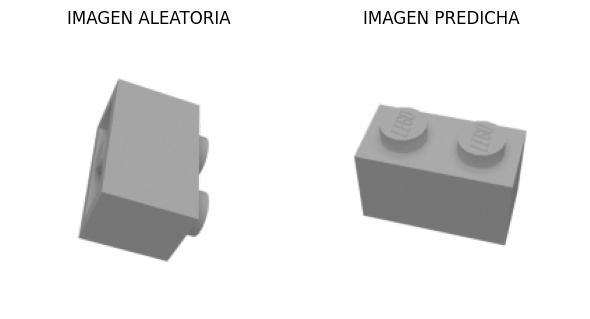

LA IMAGEN '0246.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 98.29%

1/1 [==============================] - 0s 51ms/step


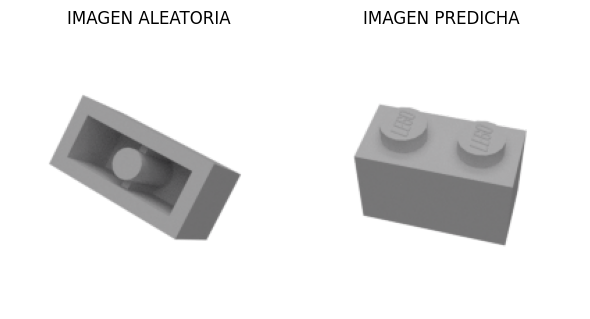

LA IMAGEN '0309.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 97.40%

1/1 [==============================] - 0s 52ms/step


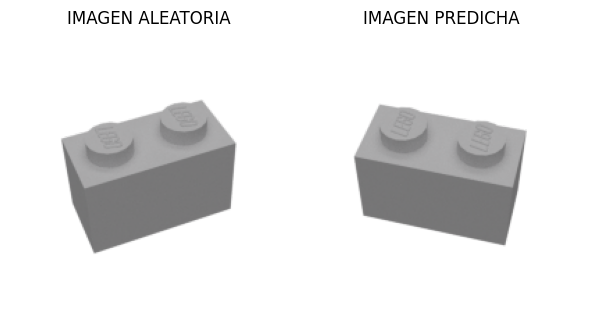

LA IMAGEN '0013.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 98.10%

1/1 [==============================] - 0s 46ms/step


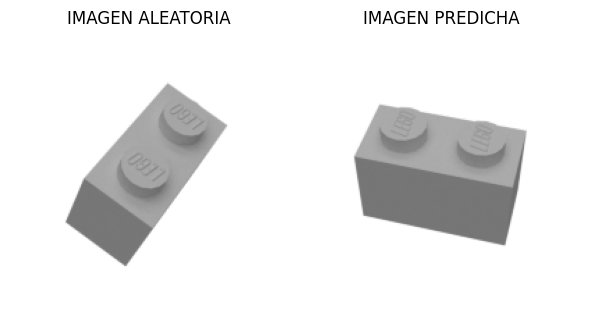

LA IMAGEN '0045.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 98.31%

1/1 [==============================] - 0s 63ms/step


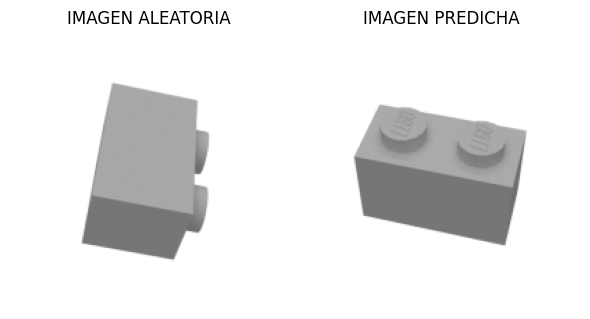

LA IMAGEN '0226.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 97.86%

1/1 [==============================] - 0s 62ms/step


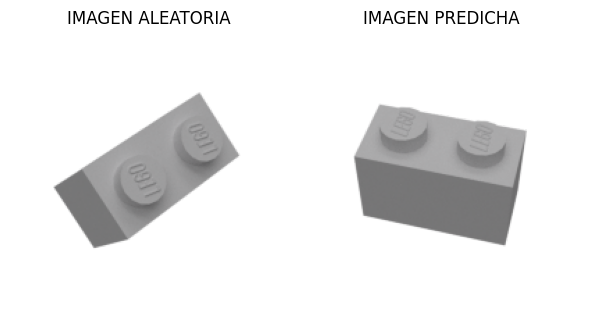

LA IMAGEN '0084.png' PERTENECE A LA CLASE '3004 Brick 1x2' con una confianza de 97.77%


----------------------------------------
Analizando carpeta: 3005 Brick 1x1
----------------------------------------

1/1 [==============================] - 0s 47ms/step


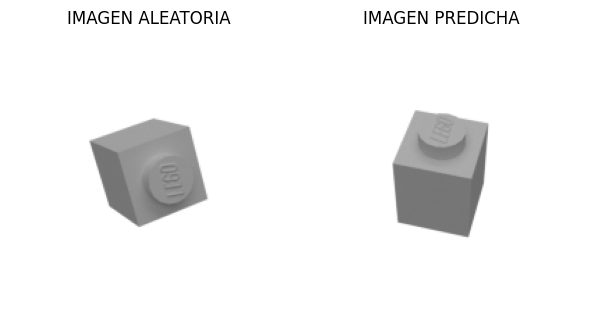

LA IMAGEN '0123.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.28%

1/1 [==============================] - 0s 71ms/step


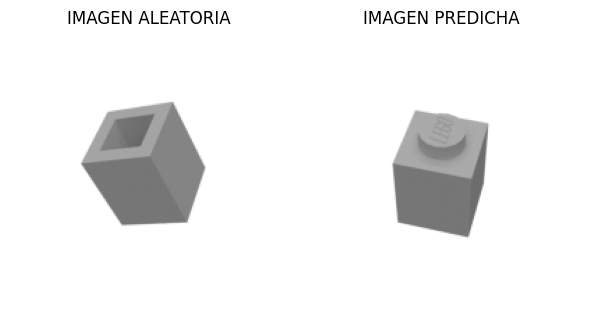

LA IMAGEN '0345.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.27%

1/1 [==============================] - 0s 48ms/step


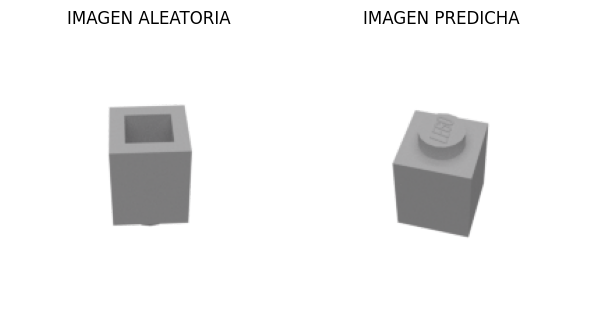

LA IMAGEN '0381.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.46%

1/1 [==============================] - 0s 46ms/step


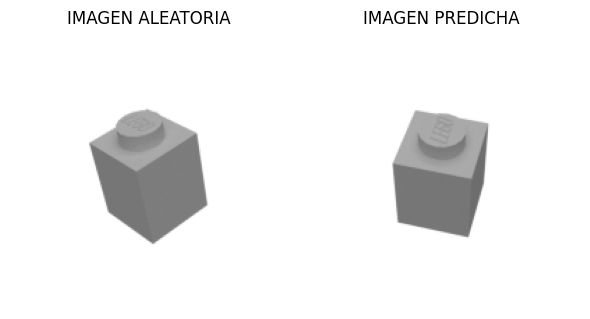

LA IMAGEN '0034.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.45%

1/1 [==============================] - 0s 50ms/step


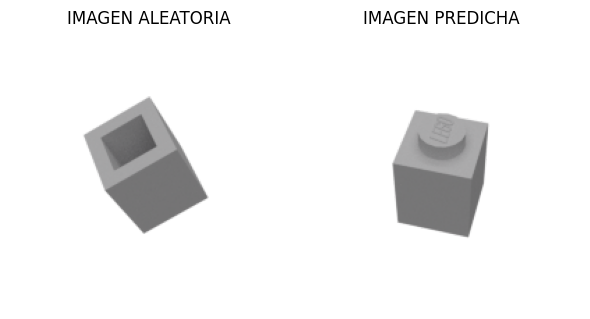

LA IMAGEN '0347.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.58%

1/1 [==============================] - 0s 59ms/step


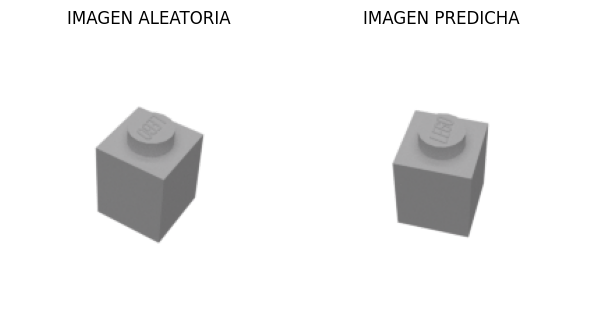

LA IMAGEN '0010.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.36%

1/1 [==============================] - 0s 46ms/step


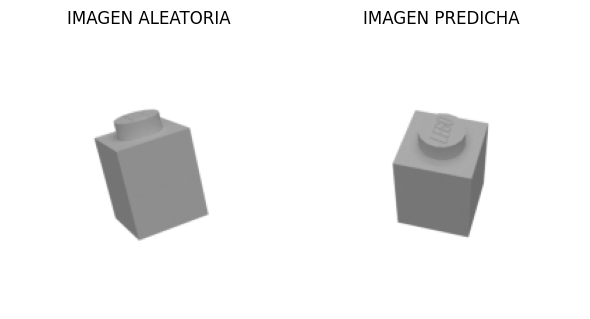

LA IMAGEN '0073.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 96.05%

1/1 [==============================] - 0s 65ms/step


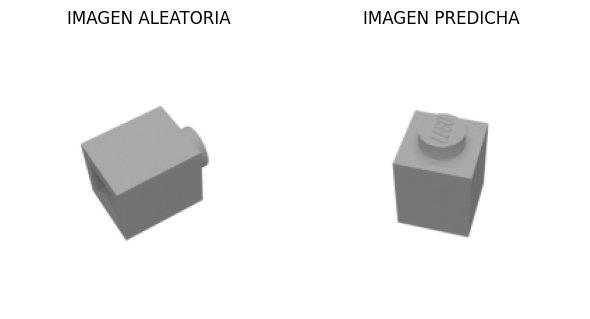

LA IMAGEN '0188.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.56%

1/1 [==============================] - 0s 46ms/step


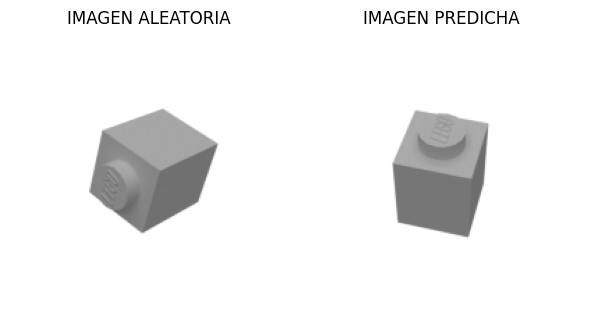

LA IMAGEN '0159.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.74%

1/1 [==============================] - 0s 44ms/step


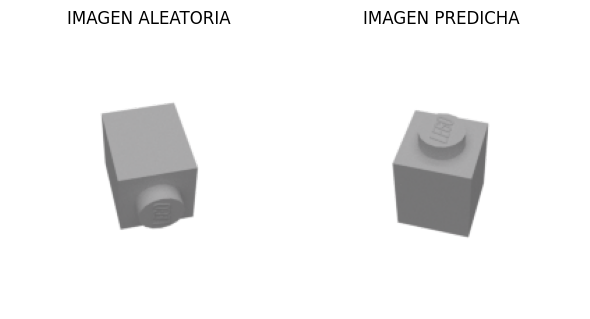

LA IMAGEN '0202.png' PERTENECE A LA CLASE '3005 Brick 1x1' con una confianza de 98.36%


----------------------------------------
Analizando carpeta: 3022 Plate 2x2
----------------------------------------

1/1 [==============================] - 0s 69ms/step


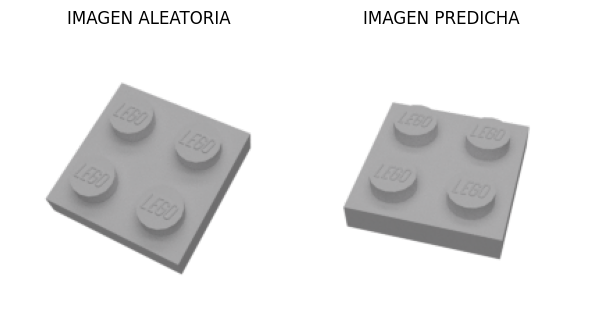

LA IMAGEN '201706161906-0040.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 98.43%

1/1 [==============================] - 0s 52ms/step


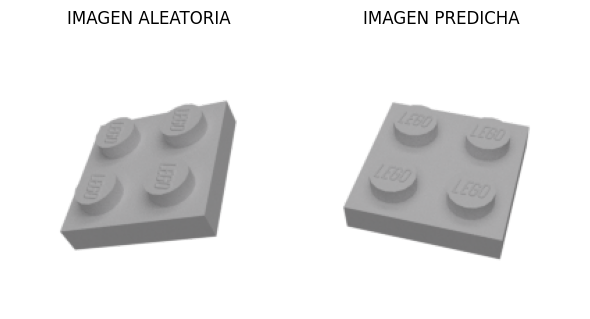

LA IMAGEN '201706161906-0056.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 98.20%

1/1 [==============================] - 0s 71ms/step


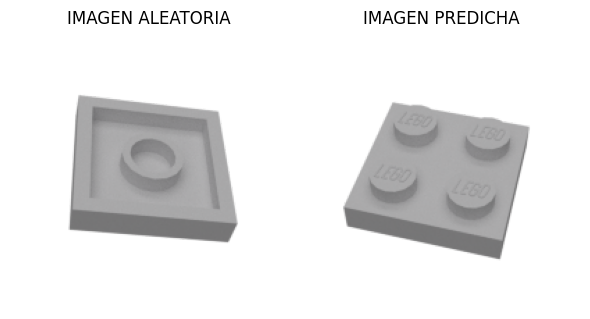

LA IMAGEN '201706161906-0376.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 98.47%

1/1 [==============================] - 0s 49ms/step


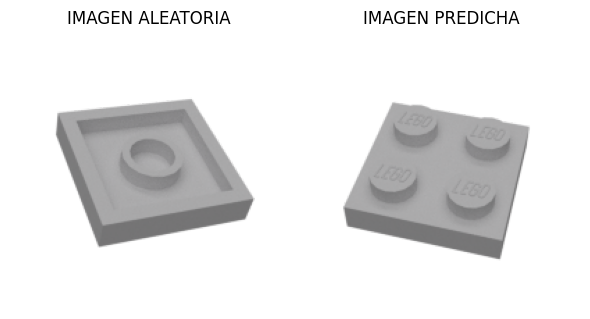

LA IMAGEN '201706161906-0377.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 98.44%

1/1 [==============================] - 0s 72ms/step


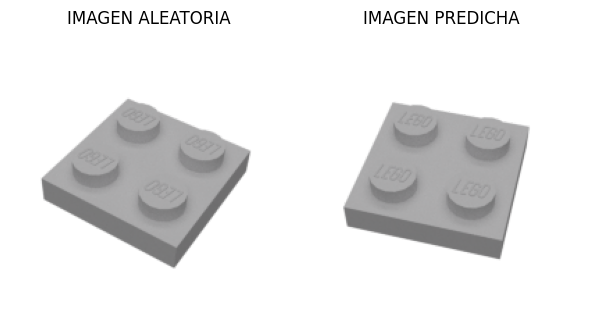

LA IMAGEN '201706161906-0010.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 98.61%

1/1 [==============================] - 0s 47ms/step


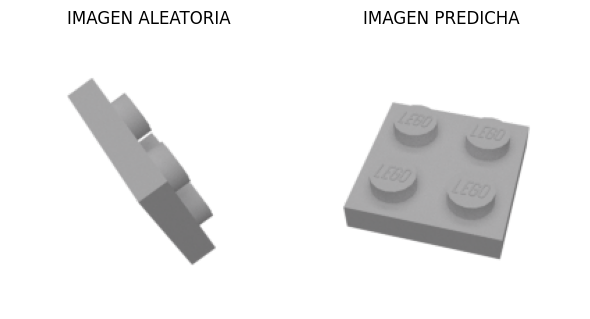

LA IMAGEN '201706161906-0148.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 97.98%

1/1 [==============================] - 0s 82ms/step


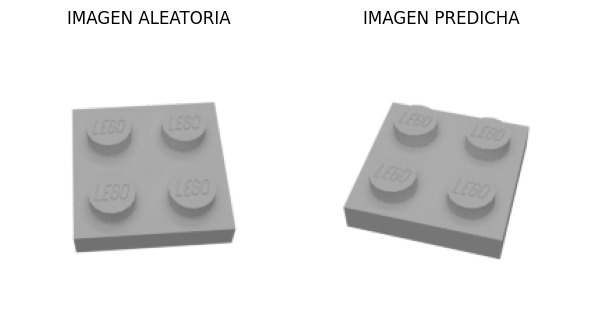

LA IMAGEN '201706161906-0022.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 97.21%

1/1 [==============================] - 0s 52ms/step


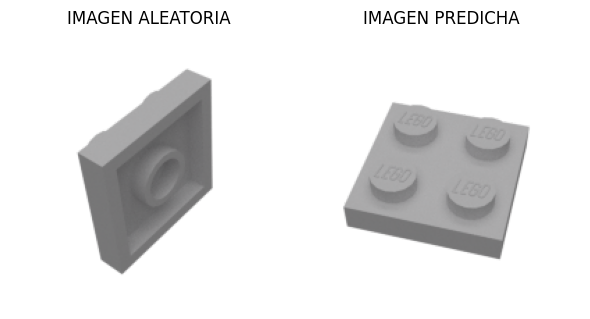

LA IMAGEN '201706161906-0214.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 97.74%

1/1 [==============================] - 0s 51ms/step


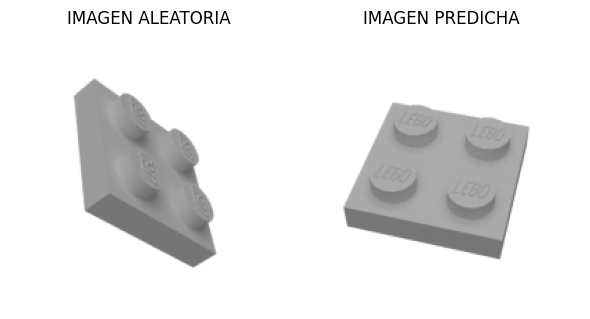

LA IMAGEN '201706161906-0107.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 97.84%

1/1 [==============================] - 0s 63ms/step


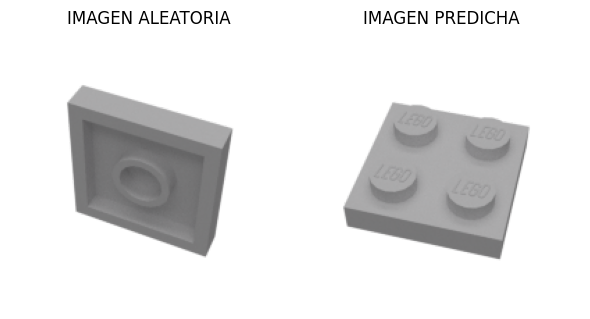

LA IMAGEN '201706161906-0210.png' PERTENECE A LA CLASE '3022 Plate 2x2' con una confianza de 98.58%


----------------------------------------
Analizando carpeta: 3023 Plate 1x2
----------------------------------------

1/1 [==============================] - 0s 49ms/step


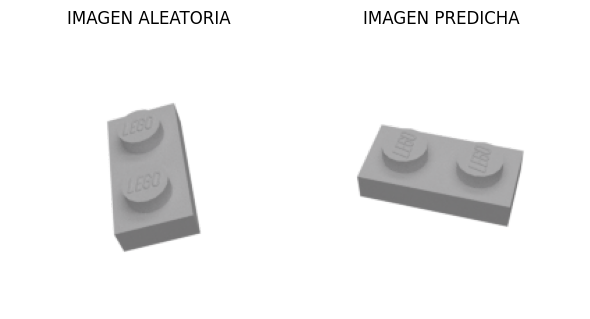

LA IMAGEN '0037.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 96.52%

1/1 [==============================] - 0s 45ms/step


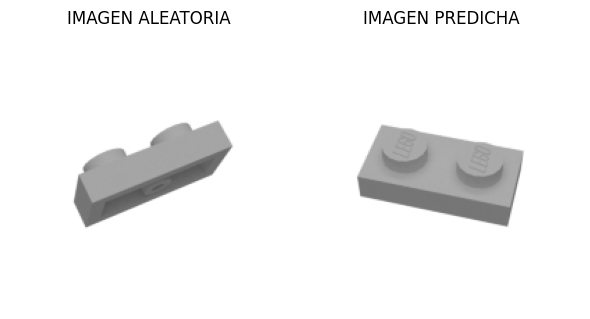

LA IMAGEN '0153.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 98.69%

1/1 [==============================] - 0s 45ms/step


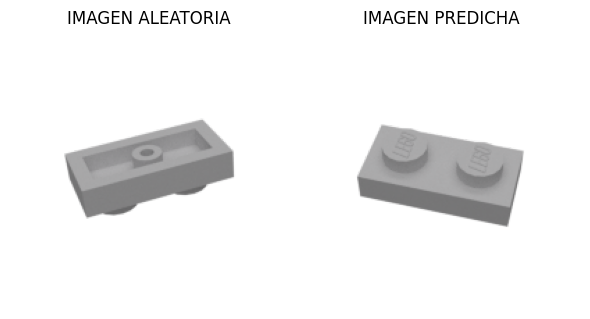

LA IMAGEN '0362.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 97.64%

1/1 [==============================] - 0s 63ms/step


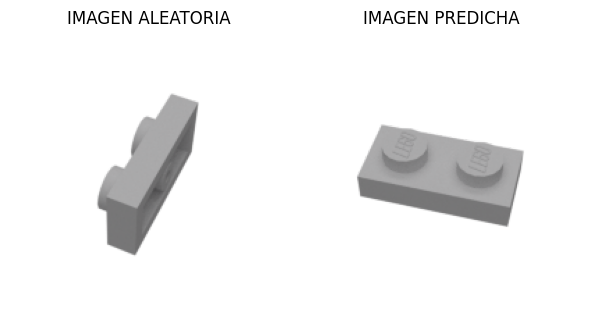

LA IMAGEN '0195.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 97.31%

1/1 [==============================] - 0s 45ms/step


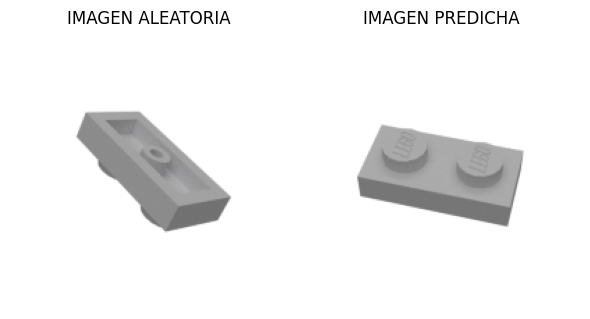

LA IMAGEN '0338.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 96.49%

1/1 [==============================] - 0s 72ms/step


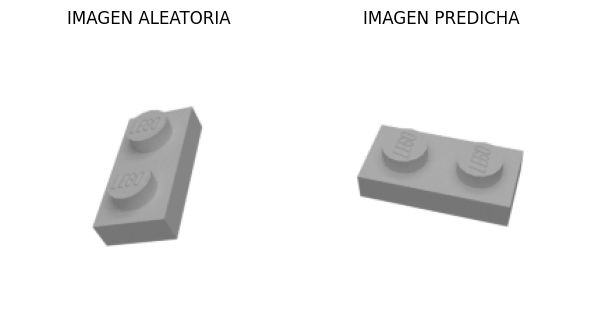

LA IMAGEN '0056.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 97.00%

1/1 [==============================] - 0s 48ms/step


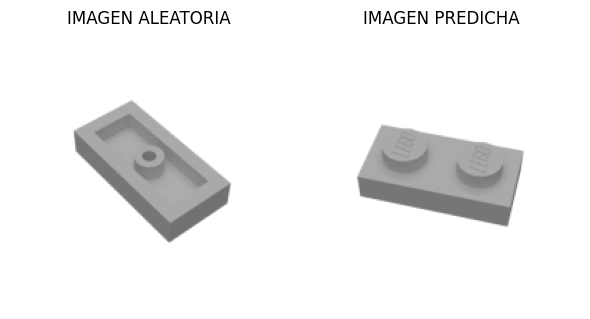

LA IMAGEN '0398.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 98.18%

1/1 [==============================] - 0s 67ms/step


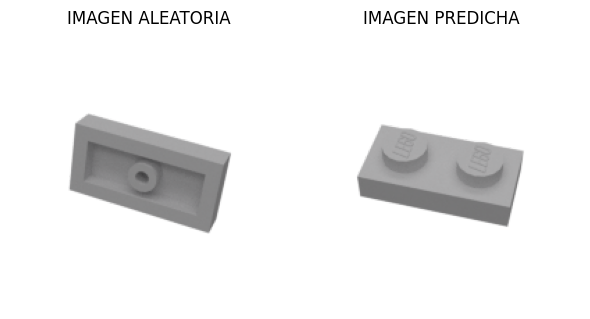

LA IMAGEN '0250.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 97.33%

1/1 [==============================] - 0s 58ms/step


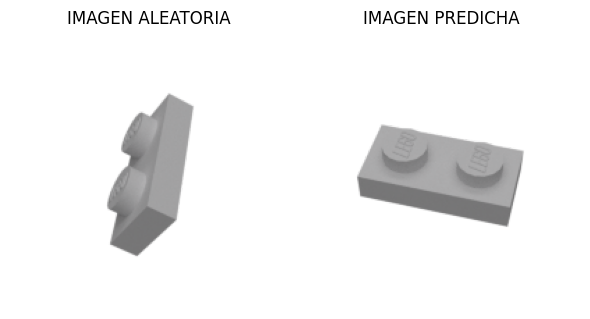

LA IMAGEN '0136.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 96.13%

1/1 [==============================] - 0s 50ms/step


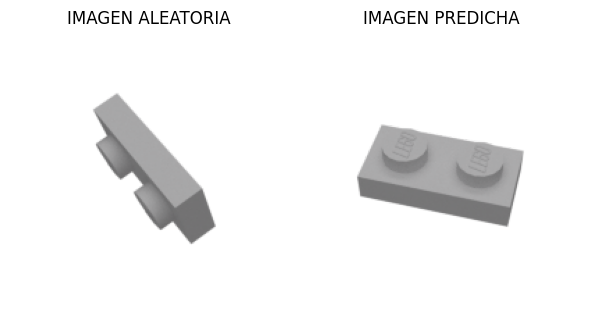

LA IMAGEN '0238.png' PERTENECE A LA CLASE '3023 Plate 1x2' con una confianza de 96.98%


----------------------------------------
Analizando carpeta: 3024 Plate 1x1
----------------------------------------

1/1 [==============================] - 0s 56ms/step


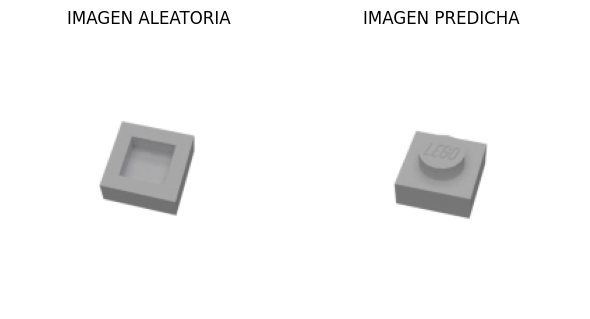

LA IMAGEN '0370.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 97.85%

1/1 [==============================] - 0s 51ms/step


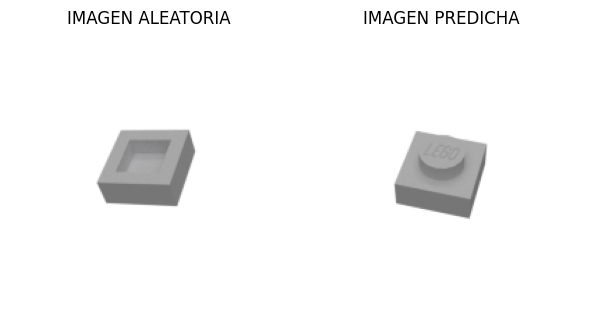

LA IMAGEN '0365.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.26%

1/1 [==============================] - 0s 50ms/step


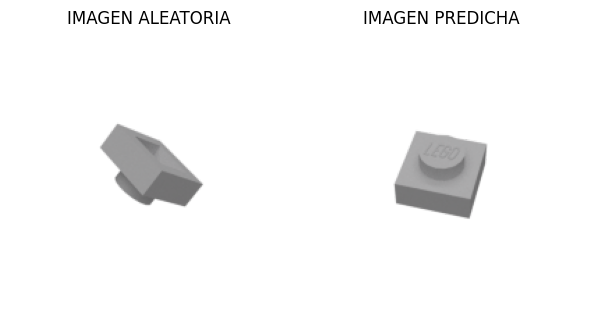

LA IMAGEN '0298.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.16%

1/1 [==============================] - 0s 57ms/step


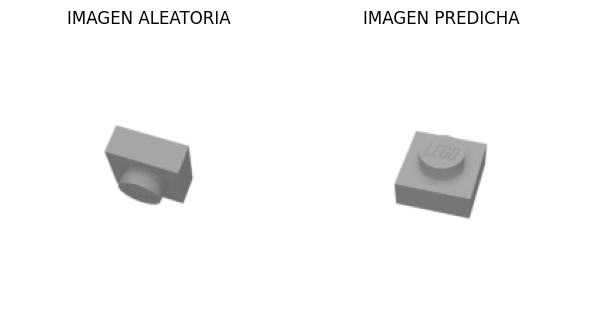

LA IMAGEN '0240.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.14%

1/1 [==============================] - 0s 51ms/step


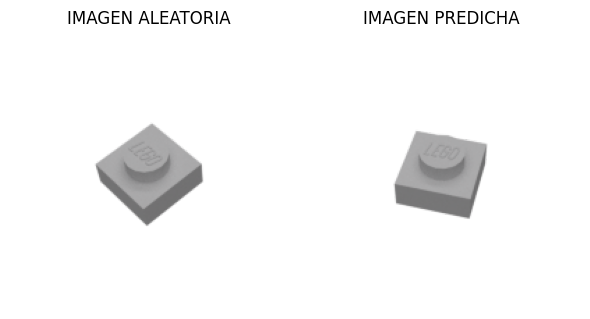

LA IMAGEN '0019.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 97.56%

1/1 [==============================] - 0s 109ms/step


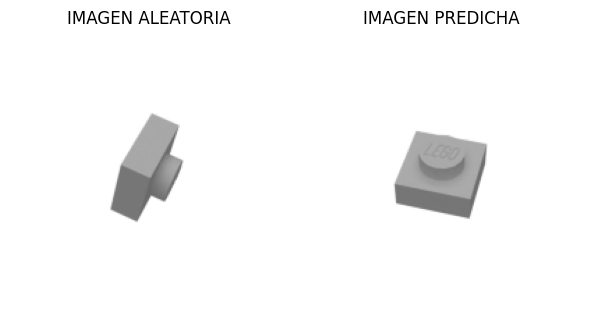

LA IMAGEN '0225.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.77%

1/1 [==============================] - 0s 59ms/step


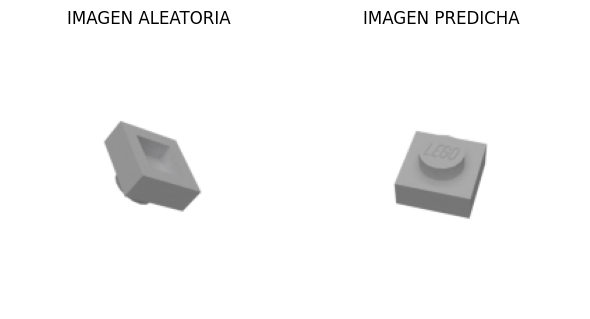

LA IMAGEN '0317.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.75%

1/1 [==============================] - 0s 64ms/step


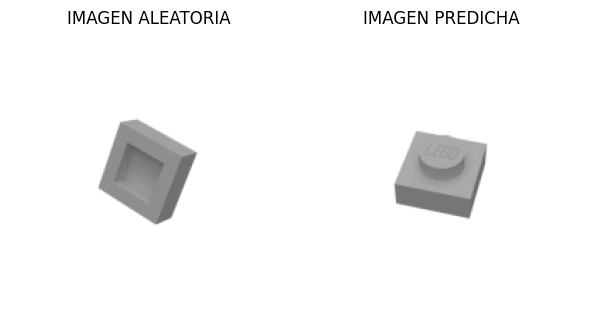

LA IMAGEN '0269.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.17%

1/1 [==============================] - 0s 62ms/step


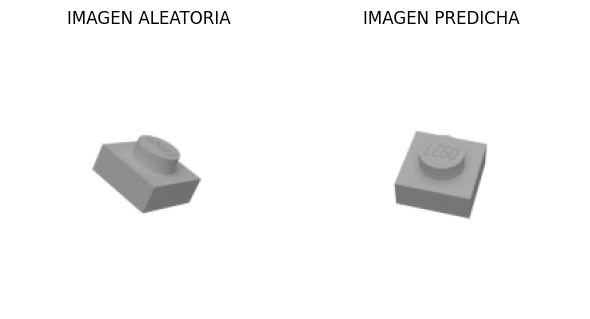

LA IMAGEN '0069.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 98.55%

1/1 [==============================] - 0s 87ms/step


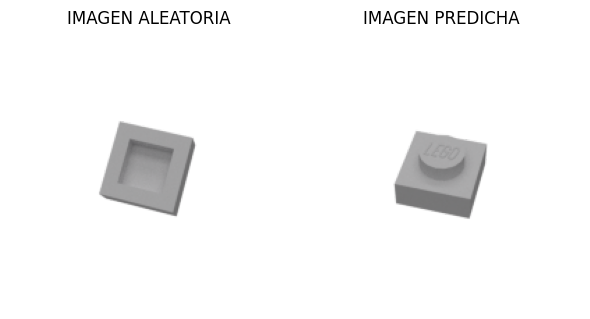

LA IMAGEN '0330.png' PERTENECE A LA CLASE '3024 Plate 1x1' con una confianza de 97.95%


----------------------------------------
Analizando carpeta: 3040 Roof Tile 1x2x45deg
----------------------------------------

1/1 [==============================] - 0s 58ms/step


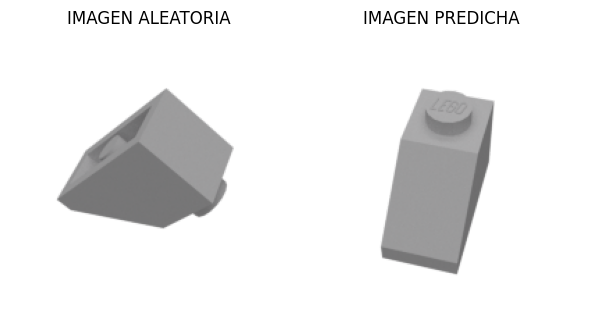

LA IMAGEN '201706162106-0285.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 97.86%

1/1 [==============================] - 0s 60ms/step


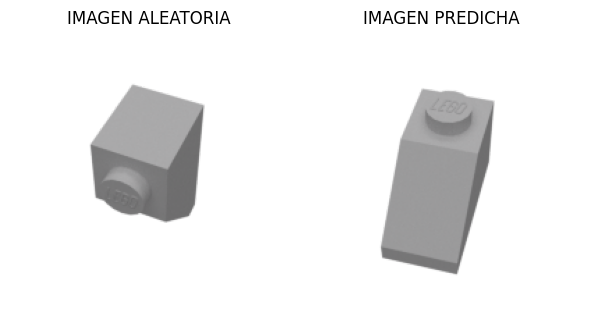

LA IMAGEN '201706162106-0200.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 97.87%

1/1 [==============================] - 0s 74ms/step


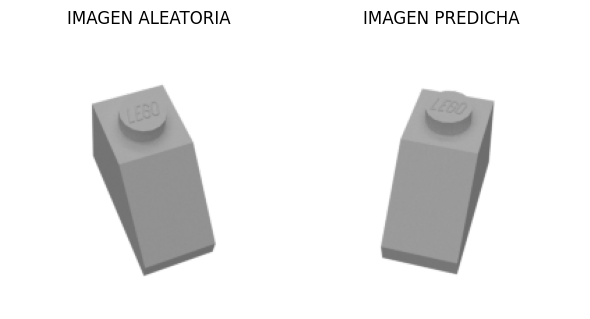

LA IMAGEN '201706162106-0023.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 98.05%

1/1 [==============================] - 0s 55ms/step


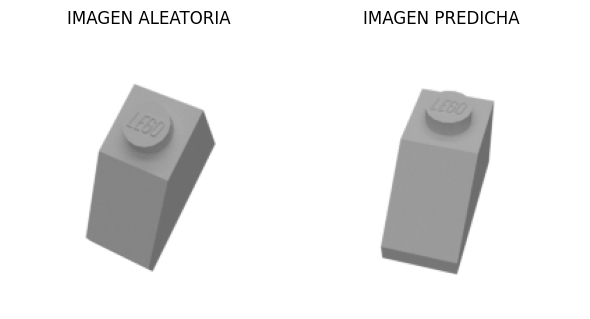

LA IMAGEN '201706162106-0060.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 97.43%

1/1 [==============================] - 0s 56ms/step


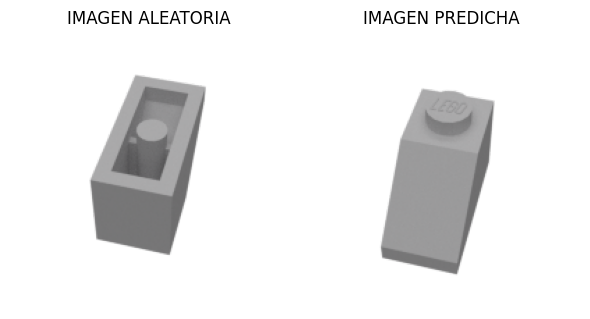

LA IMAGEN '201706162106-0400.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 96.46%

1/1 [==============================] - 0s 50ms/step


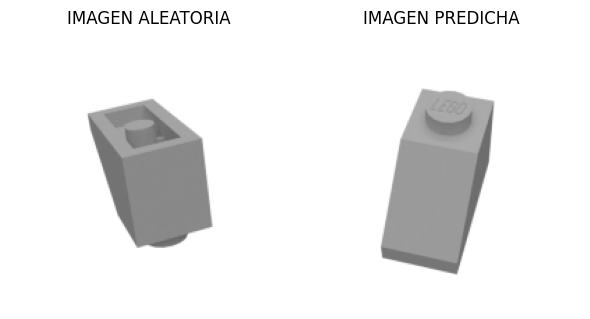

LA IMAGEN '201706162106-0342.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 98.56%

1/1 [==============================] - 0s 79ms/step


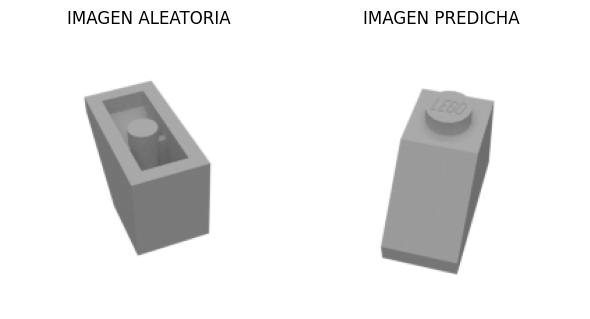

LA IMAGEN '201706162106-0382.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 98.63%

1/1 [==============================] - 0s 56ms/step


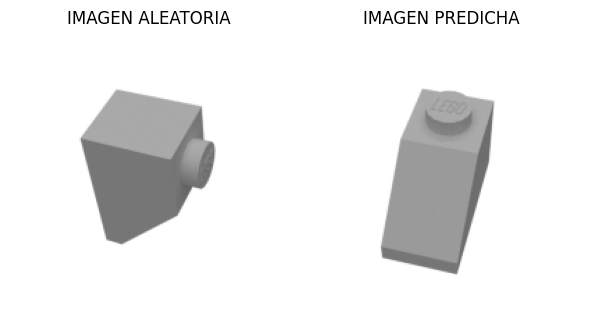

LA IMAGEN '201706162106-0185.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 98.36%

1/1 [==============================] - 0s 69ms/step


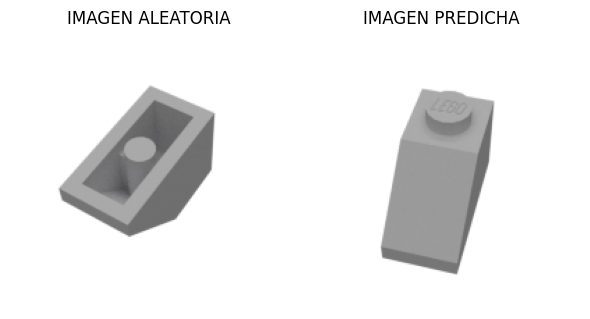

LA IMAGEN '201706162106-0389.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 98.20%

1/1 [==============================] - 0s 52ms/step


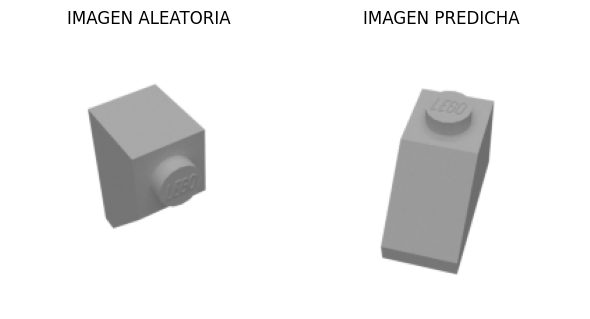

LA IMAGEN '201706162106-0183.png' PERTENECE A LA CLASE '3040 Roof Tile 1x2x45deg' con una confianza de 97.58%


----------------------------------------
Analizando carpeta: 3069 Flat Tile 1x2
----------------------------------------

1/1 [==============================] - 0s 74ms/step


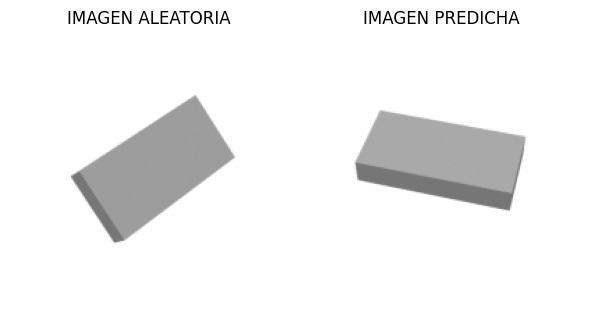

LA IMAGEN '0084.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 97.70%

1/1 [==============================] - 0s 59ms/step


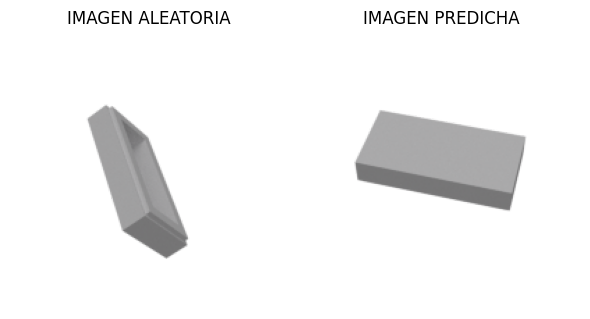

LA IMAGEN '0277.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.97%

1/1 [==============================] - 0s 61ms/step


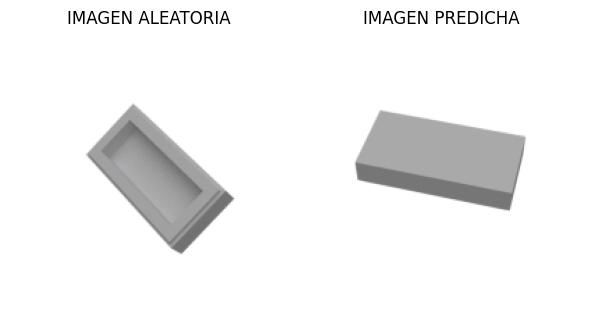

LA IMAGEN '0328.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.23%

1/1 [==============================] - 0s 51ms/step


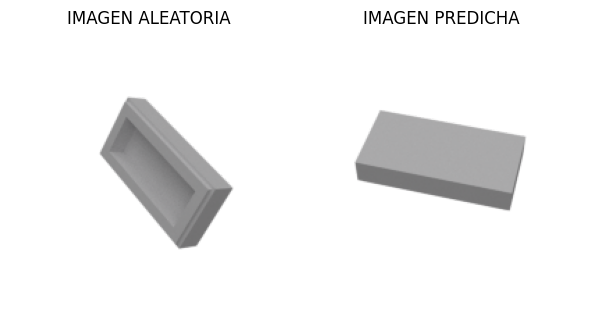

LA IMAGEN '0268.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.44%

1/1 [==============================] - 0s 49ms/step


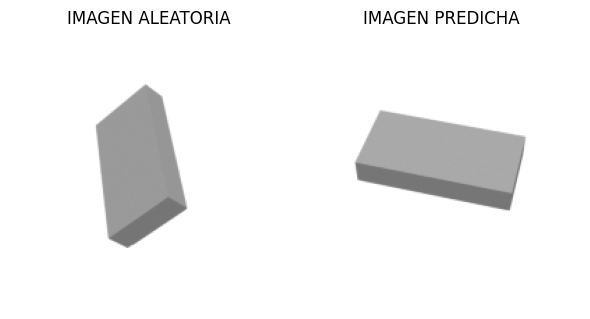

LA IMAGEN '0097.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.43%

1/1 [==============================] - 0s 56ms/step


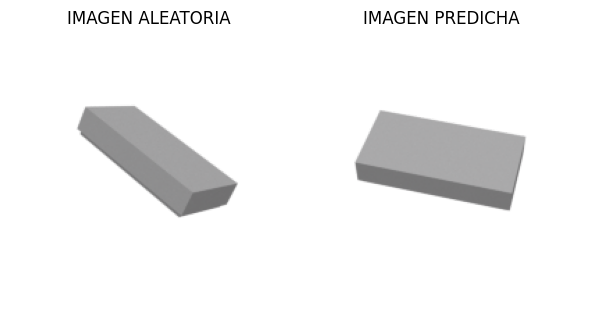

LA IMAGEN '0069.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.97%

1/1 [==============================] - 0s 72ms/step


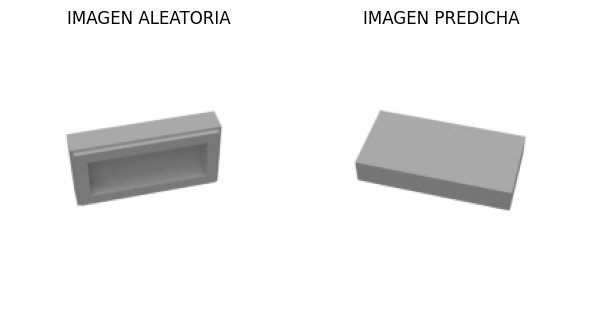

LA IMAGEN '0212.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.64%

1/1 [==============================] - 0s 46ms/step


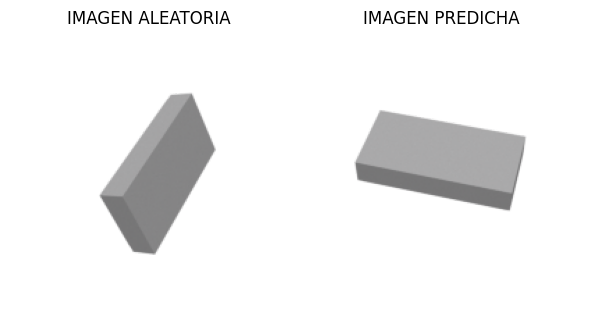

LA IMAGEN '0145.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.28%

1/1 [==============================] - 0s 57ms/step


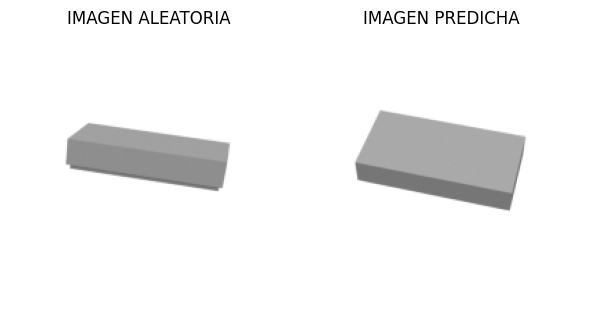

LA IMAGEN '0071.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.84%

1/1 [==============================] - 0s 54ms/step


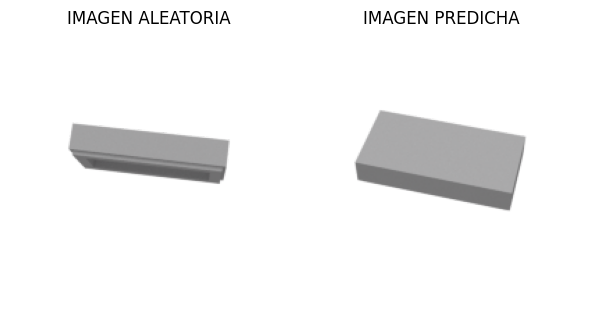

LA IMAGEN '0131.png' PERTENECE A LA CLASE '3069 Flat Tile 1x2' con una confianza de 98.09%


----------------------------------------
Analizando carpeta: 32123 half Bush
----------------------------------------

1/1 [==============================] - 0s 50ms/step


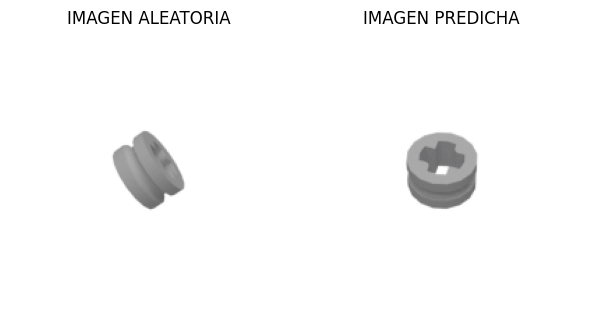

LA IMAGEN '201706171506-0277.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 97.99%

1/1 [==============================] - 0s 68ms/step


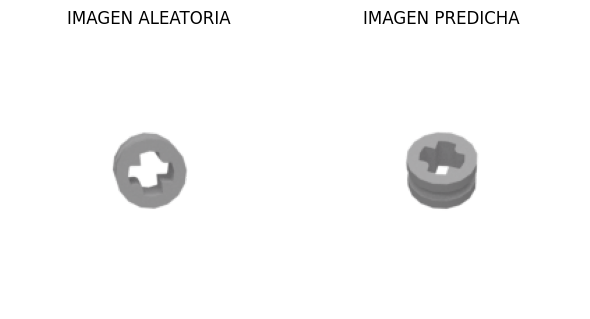

LA IMAGEN '201706171506-0122.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.26%

1/1 [==============================] - 0s 63ms/step


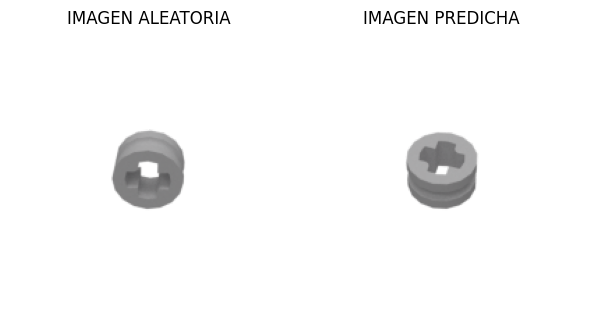

LA IMAGEN '201706171506-0231.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 97.98%

1/1 [==============================] - 0s 60ms/step


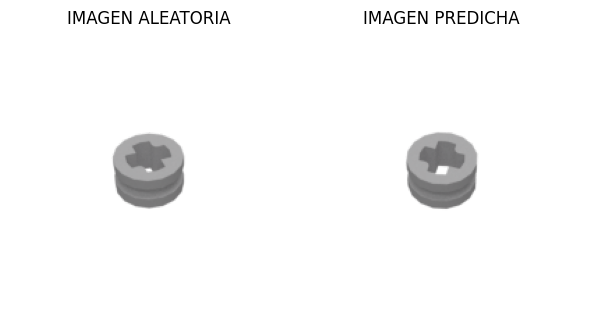

LA IMAGEN '201706171506-0013.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.33%

1/1 [==============================] - 0s 52ms/step


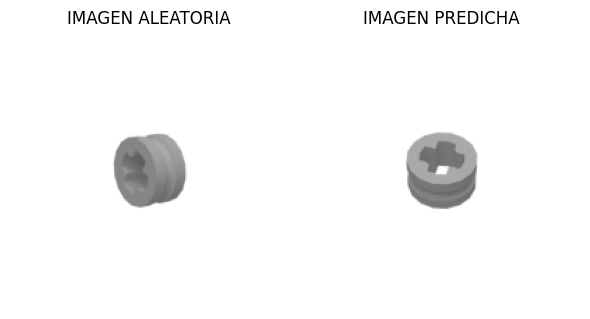

LA IMAGEN '201706171506-0248.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.57%

1/1 [==============================] - 0s 56ms/step


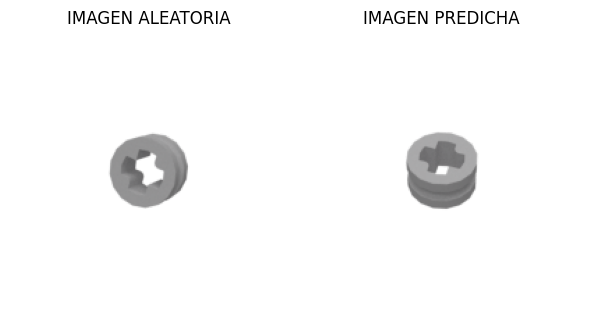

LA IMAGEN '201706171506-0120.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.27%

1/1 [==============================] - 0s 58ms/step


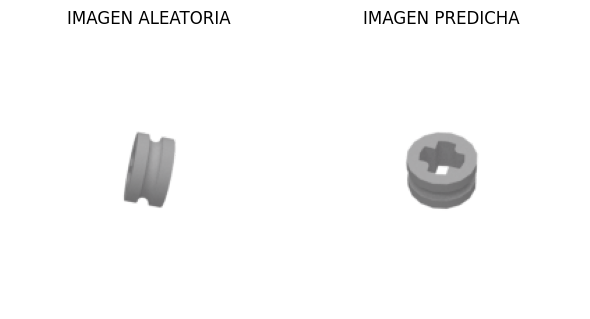

LA IMAGEN '201706171506-0226.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.89%

1/1 [==============================] - 0s 52ms/step


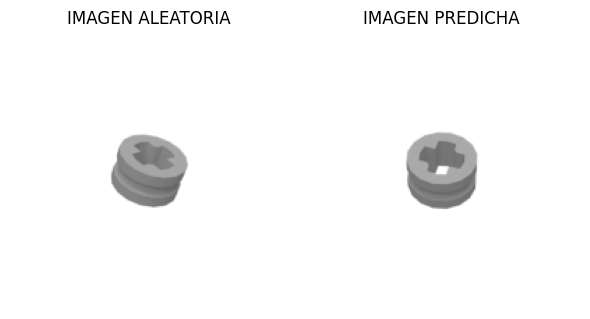

LA IMAGEN '201706171506-0358.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 97.94%

1/1 [==============================] - 0s 68ms/step


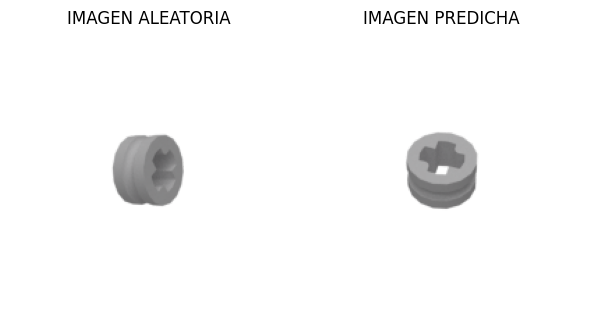

LA IMAGEN '201706171506-0145.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.71%

1/1 [==============================] - 0s 71ms/step


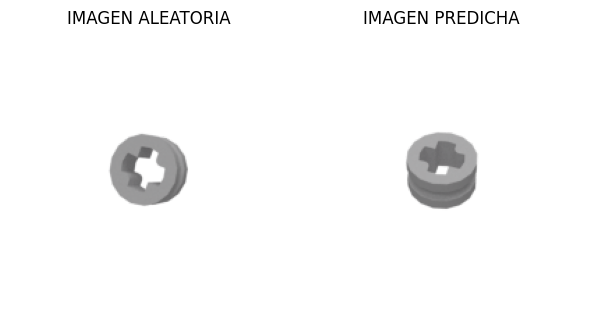

LA IMAGEN '201706171506-0100.png' PERTENECE A LA CLASE '32123 half Bush' con una confianza de 98.33%


----------------------------------------
Analizando carpeta: 3673 Peg 2M
----------------------------------------

1/1 [==============================] - 0s 58ms/step


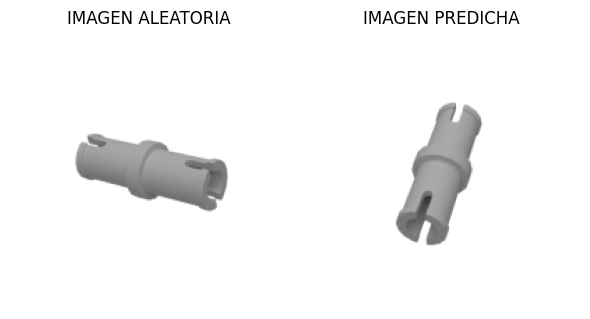

LA IMAGEN '0035.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 98.06%

1/1 [==============================] - 0s 51ms/step


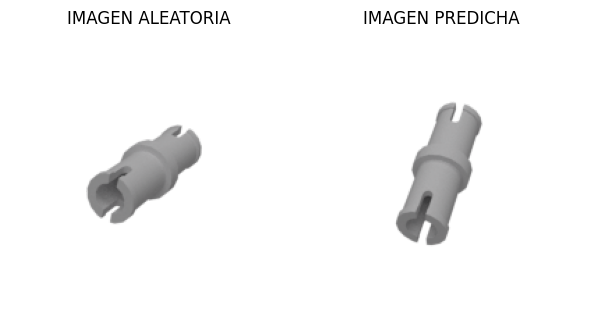

LA IMAGEN '0050.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 98.64%

1/1 [==============================] - 0s 54ms/step


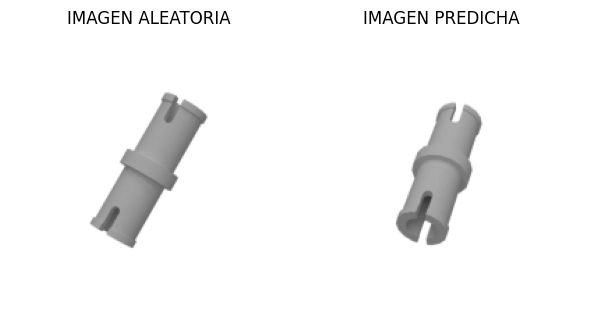

LA IMAGEN '0329.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 98.49%

1/1 [==============================] - 0s 50ms/step


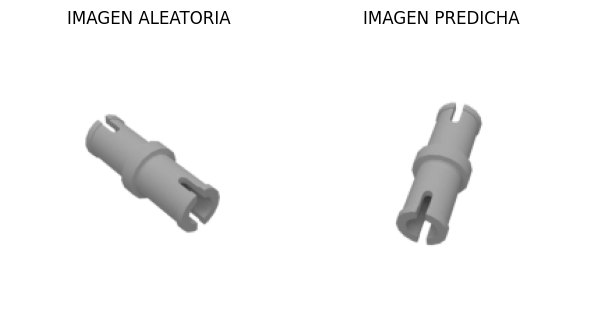

LA IMAGEN '0014.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 97.42%

1/1 [==============================] - 0s 57ms/step


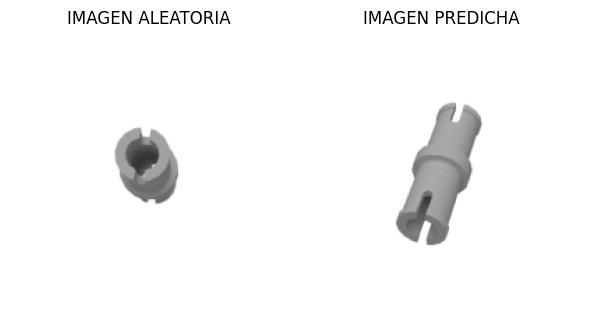

LA IMAGEN '0131.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 98.54%

1/1 [==============================] - 0s 95ms/step


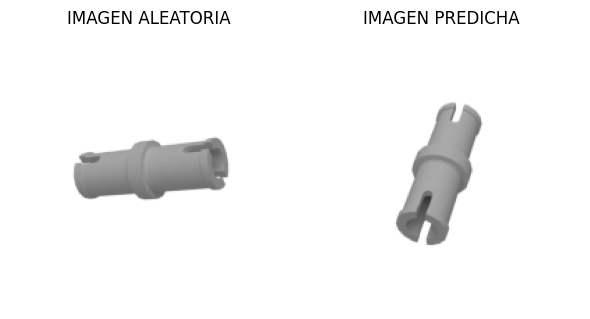

LA IMAGEN '0345.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 98.35%

1/1 [==============================] - 0s 54ms/step


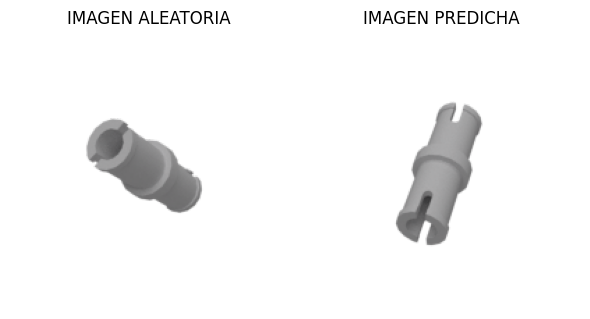

LA IMAGEN '0278.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 97.60%

1/1 [==============================] - 0s 68ms/step


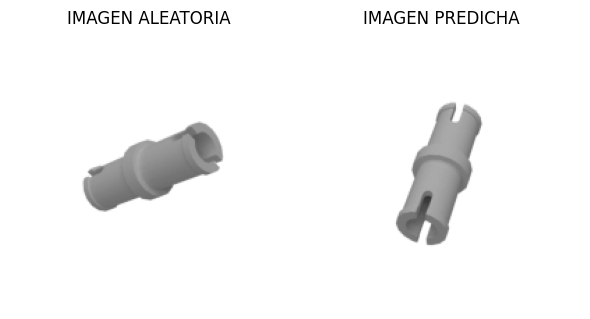

LA IMAGEN '0305.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 98.40%

1/1 [==============================] - 0s 63ms/step


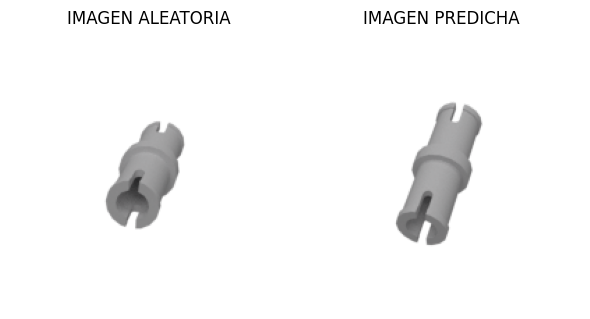

LA IMAGEN '0051.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 99.57%

1/1 [==============================] - 0s 54ms/step


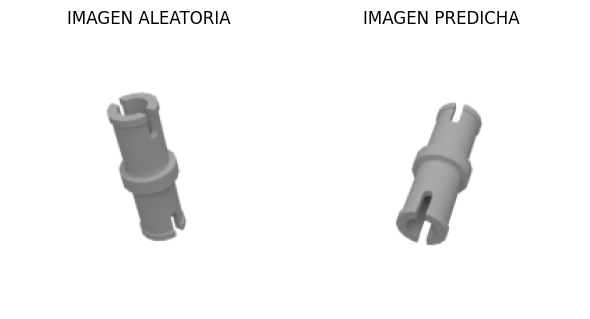

LA IMAGEN '0164.png' PERTENECE A LA CLASE '3673 Peg 2M' con una confianza de 96.54%


----------------------------------------
Analizando carpeta: 3713 Bush for Cross Axle
----------------------------------------

1/1 [==============================] - 0s 55ms/step


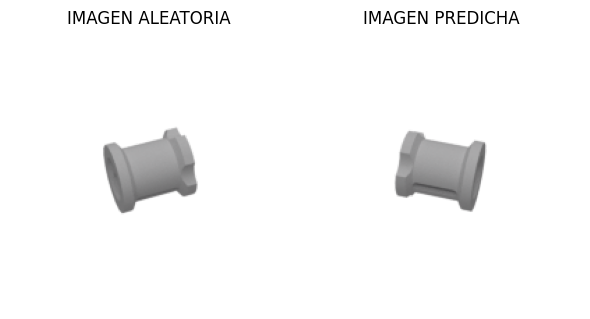

LA IMAGEN '201706171506-0352.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.42%

1/1 [==============================] - 0s 55ms/step


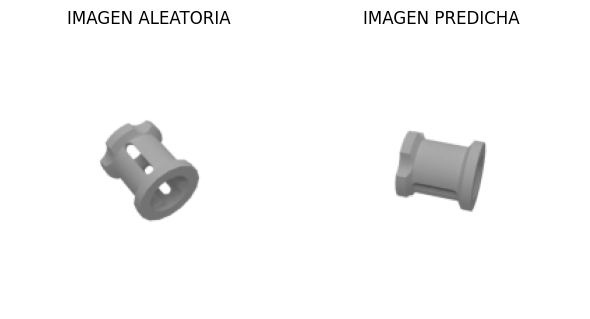

LA IMAGEN '201706171506-0258.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.39%

1/1 [==============================] - 0s 48ms/step


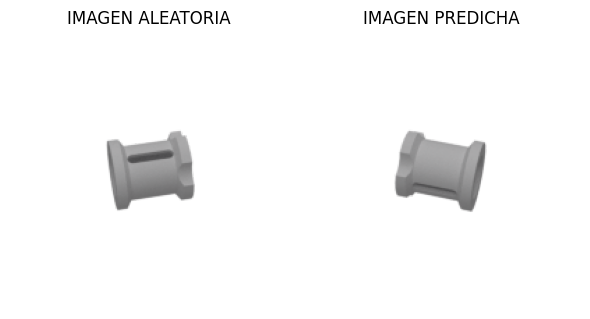

LA IMAGEN '201706171506-0172.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.38%

1/1 [==============================] - 0s 50ms/step


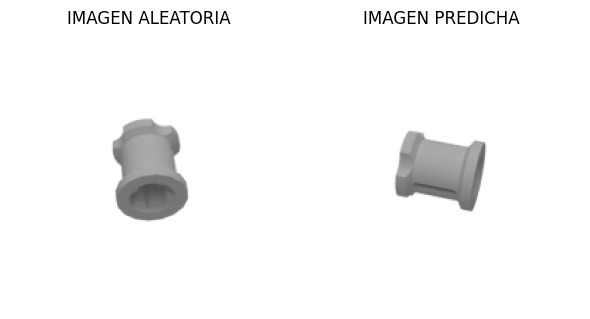

LA IMAGEN '201706171506-0037.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.49%

1/1 [==============================] - 0s 47ms/step


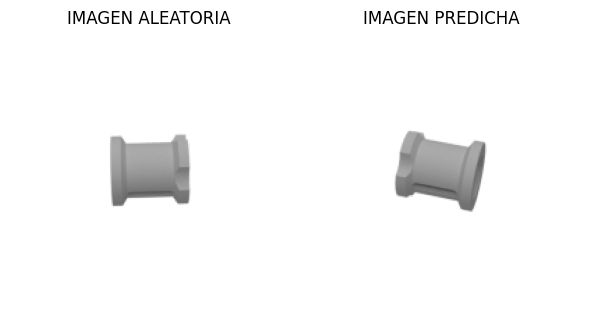

LA IMAGEN '201706171506-0371.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.03%

1/1 [==============================] - 0s 56ms/step


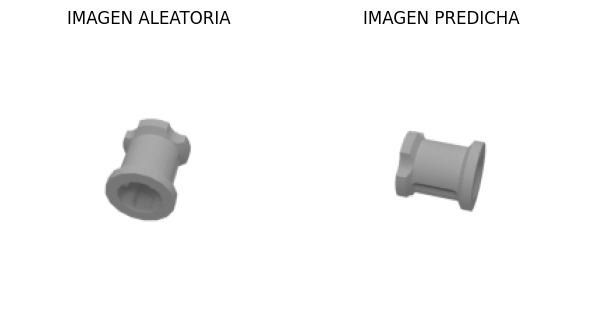

LA IMAGEN '201706171506-0016.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.90%

1/1 [==============================] - 0s 57ms/step


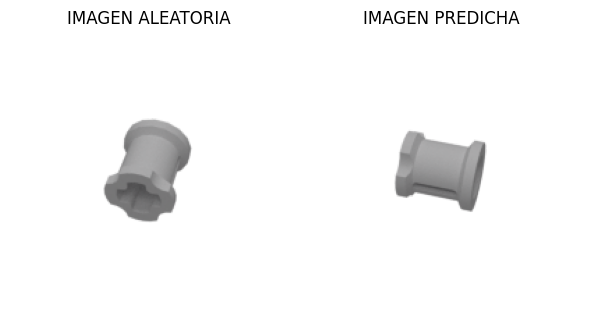

LA IMAGEN '201706171506-0385.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.66%

1/1 [==============================] - 0s 61ms/step


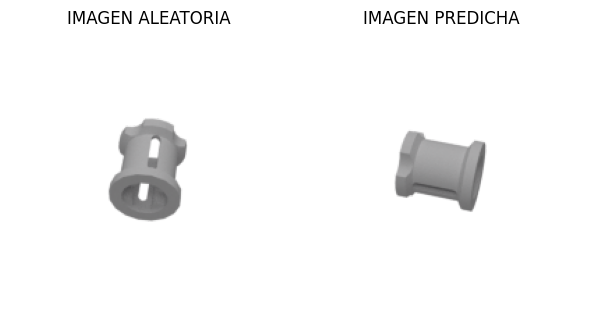

LA IMAGEN '201706171506-0176.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.51%

1/1 [==============================] - 0s 53ms/step


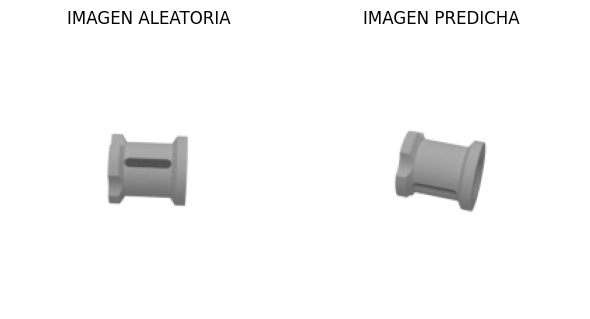

LA IMAGEN '201706171506-0261.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.34%

1/1 [==============================] - 0s 57ms/step


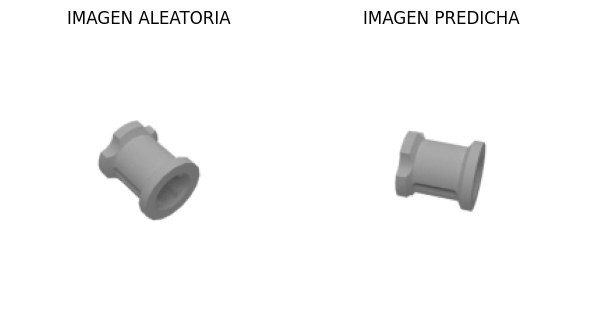

LA IMAGEN '201706171506-0398.png' PERTENECE A LA CLASE '3713 Bush for Cross Axle' con una confianza de 98.33%


----------------------------------------
Analizando carpeta: 3794 Plate 1X2 with 1 Knob
----------------------------------------

1/1 [==============================] - 0s 61ms/step


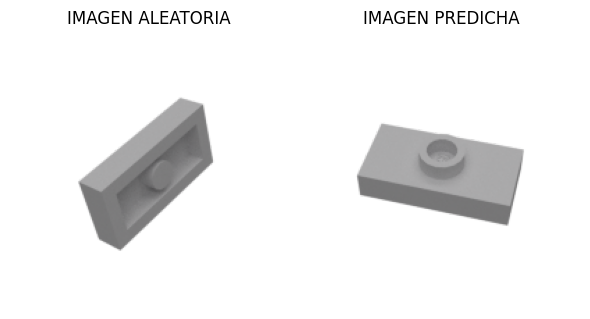

LA IMAGEN '201706161606-0234.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.54%

1/1 [==============================] - 0s 49ms/step


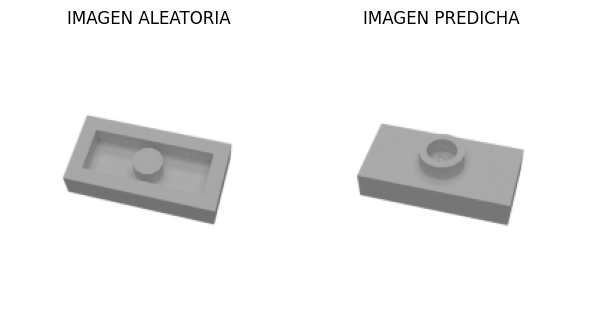

LA IMAGEN '201706161606-0370.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.21%

1/1 [==============================] - 0s 48ms/step


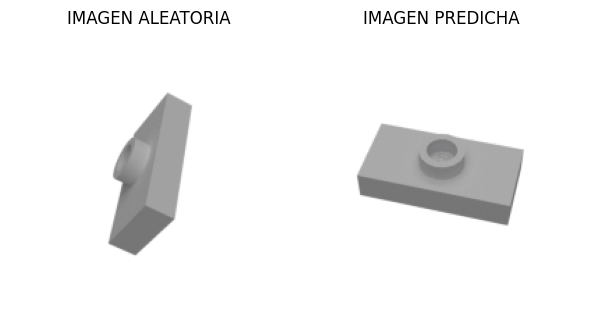

LA IMAGEN '201706161606-0136.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.60%

1/1 [==============================] - 0s 79ms/step


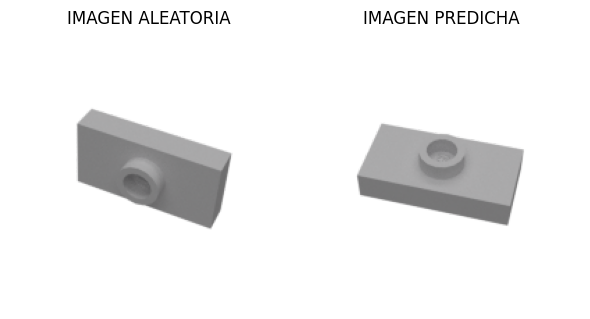

LA IMAGEN '201706161606-0180.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 98.34%

1/1 [==============================] - 0s 78ms/step


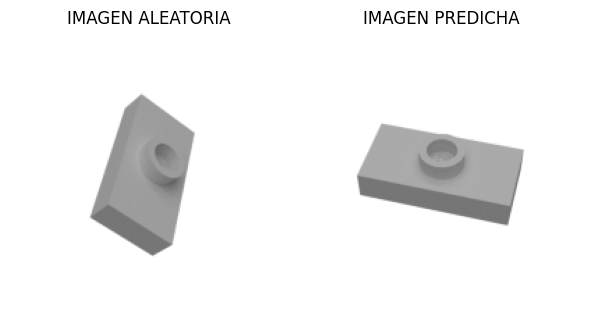

LA IMAGEN '201706161606-0086.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 98.97%

1/1 [==============================] - 0s 58ms/step


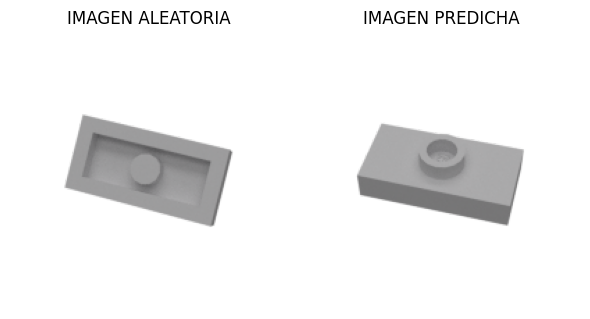

LA IMAGEN '201706161606-0310.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 98.34%

1/1 [==============================] - 0s 66ms/step


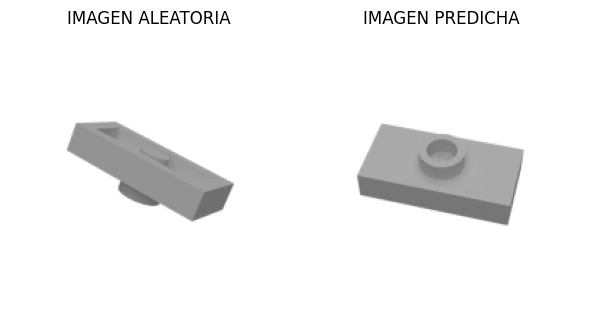

LA IMAGEN '201706161606-0319.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.92%

1/1 [==============================] - 0s 53ms/step


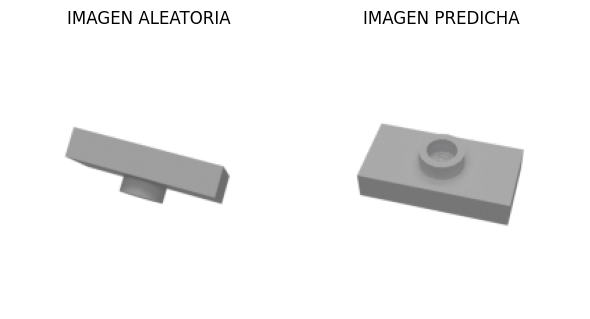

LA IMAGEN '201706161606-0280.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.08%

1/1 [==============================] - 0s 50ms/step


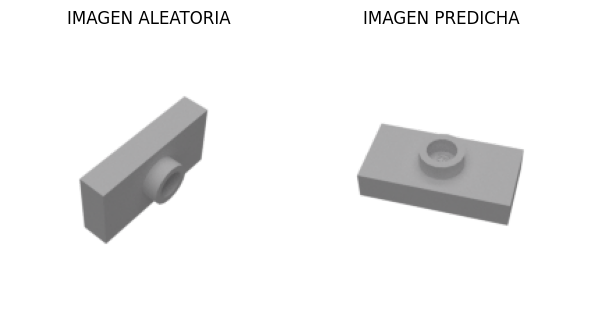

LA IMAGEN '201706161606-0204.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.74%

1/1 [==============================] - 0s 68ms/step


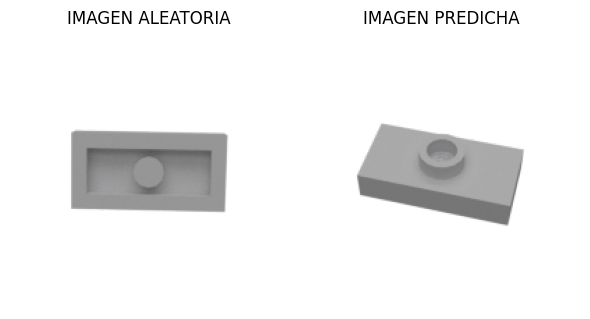

LA IMAGEN '201706161606-0291.png' PERTENECE A LA CLASE '3794 Plate 1X2 with 1 Knob' con una confianza de 97.99%


----------------------------------------
Analizando carpeta: 6632 Technic Lever 3M
----------------------------------------

1/1 [==============================] - 0s 58ms/step


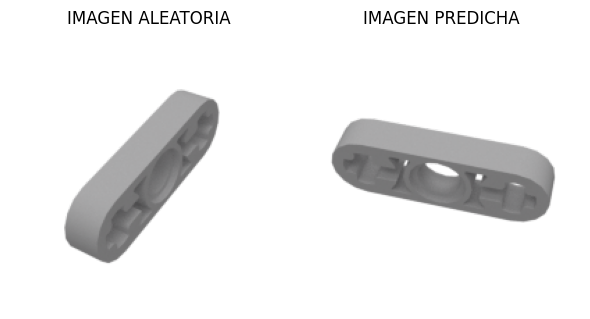

LA IMAGEN '201706171606-0384.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.53%

1/1 [==============================] - 0s 51ms/step


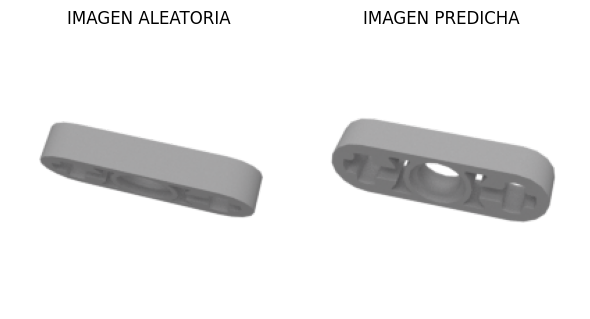

LA IMAGEN '201706171606-0350.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.33%

1/1 [==============================] - 0s 65ms/step


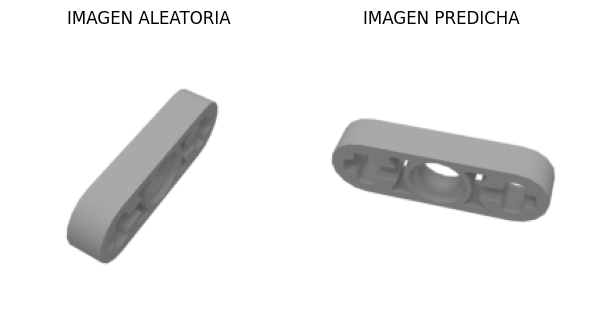

LA IMAGEN '201706171606-0005.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.41%

1/1 [==============================] - 0s 61ms/step


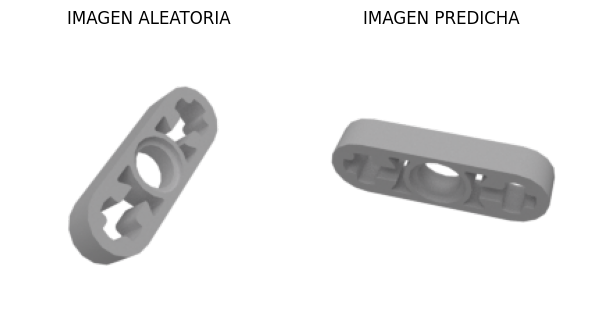

LA IMAGEN '201706171606-0115.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.34%

1/1 [==============================] - 0s 55ms/step


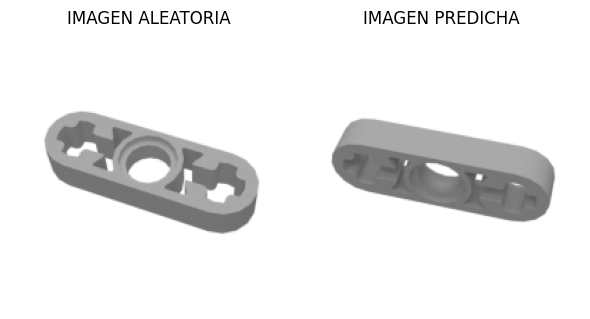

LA IMAGEN '201706171606-0220.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.31%

1/1 [==============================] - 0s 65ms/step


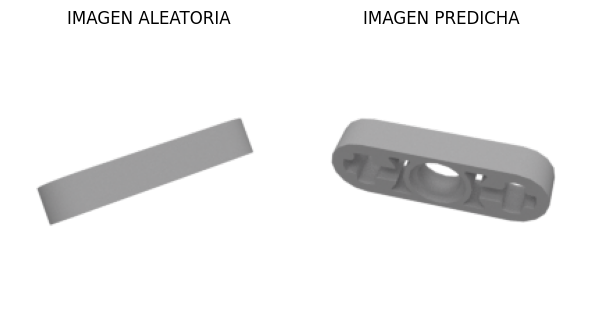

LA IMAGEN '201706171606-0083.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.43%

1/1 [==============================] - 0s 52ms/step


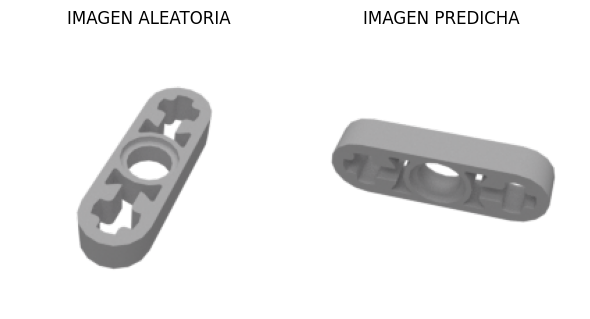

LA IMAGEN '201706171606-0195.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.21%

1/1 [==============================] - 0s 53ms/step


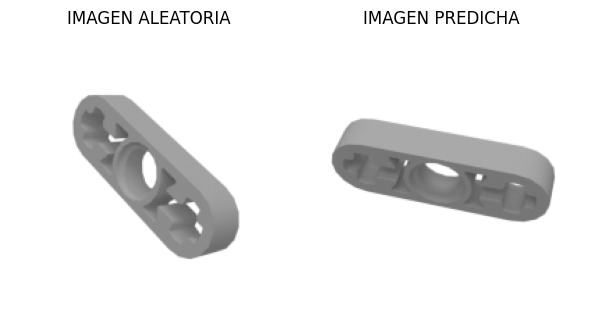

LA IMAGEN '201706171606-0338.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.25%

1/1 [==============================] - 0s 59ms/step


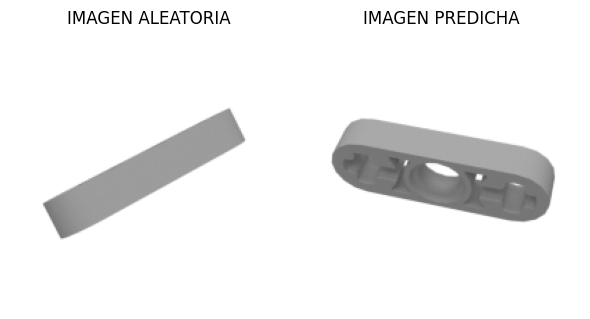

LA IMAGEN '201706171606-0313.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 98.83%

1/1 [==============================] - 0s 52ms/step


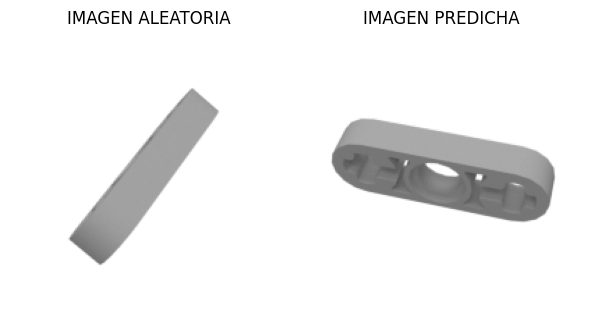

LA IMAGEN '201706171606-0065.png' PERTENECE A LA CLASE '6632 Technic Lever 3M' con una confianza de 99.15%



In [16]:
# Preguntar al usuario qué acción desea realizar
os.system('cls')
user_choice = input("¿Deseas especificar tú una imagen para hacer la predicción (opción 1) o deseas que se comprueben 10 imágenes aleatorias de cada carpeta (opción 2)? Ingrese 1 o 2: ")

if user_choice == '1':
    # Opción 1: Pedir al usuario una imagen y mostrar la predicción
    image_path = input("Ingrese la ruta de la imagen: ")
    # Realizar la prediccion de la imagen ingresada por el usuario
    predicted_class, confidence, img, class_folder_name = predict_single_image(image_path, width=6, height=6)
    # Mostrar a que clase pertenece y el porcentaje de confianza
    print(f"LA IMAGEN PERTENECE A LA CLASE '{class_folder_name}' con una confianza de {confidence * 100:.2f}%")

elif user_choice == '2':
    # Opción 2: Comprobar 10 imágenes aleatorias de cada carpeta
    # Carpeta principal
    base_folder = "C:/PYTHON/PRACTICAS/09 Lego Bricks/archive/LEGO_brick_images_v1/"

    # Especificar el tamaño de la imagen ajustando las siguientes variables
    width = 6
    height = 6

    # Iterar sobre cada subcarpeta
    for class_name in os.listdir(base_folder):
        # Concatenamos la carpeta principal junto con 
        # la carpeta que se esta analizando en este momento
        class_folder_path = os.path.join(base_folder, class_name)

        # Verificar que el elemento que estamos analizando es una carpeta
        # dentro de la carpeta principal
        if os.path.isdir(class_folder_path):
            # Imprimir título
            print(f"\n{'-' * 40}")
            print(f"Analizando carpeta: {class_name}")
            print(f"{'-' * 40}\n")

            # Obtener la lista de todas las imágenes en la subcarpeta
            image_list = os.listdir(class_folder_path)

            # Seleccionar aleatoriamente 10 imágenes de la lista
            selected_images = random.sample(image_list, 10)

            # Iterar sobre las imágenes seleccionadas
            for selected_image in selected_images:
                # Construir la ruta completa de la imagen seleccionada
                selected_image_path = os.path.join(class_folder_path, selected_image)

                # Obtener la predicción para la imagen seleccionada
                predicted_class, confidence, img, predicted_class_name = predict_single_image(selected_image_path, width, height)

                # Mostrar la predicción y repetimos el bucle hasta que termina con todas las carpetas
                print(f"LA IMAGEN '{selected_image}' PERTENECE A LA CLASE '{predicted_class_name}' con una confianza de {confidence * 100:.2f}%\n")

else:
    print("Opción no válida. Por favor, ingrese 1 o 2.")